<a href="https://colab.research.google.com/github/Mahmood-Anaam/Saudi-Stock-Exchange-Tadawul-prediction/blob/main/notebooks/time-series-analysis-on-close-prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahmood-Anaam/Saudi-Stock-Exchange-Tadawul-prediction.git

Cloning into 'Saudi-Stock-Exchange-Tadawul-prediction'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 5), reused 13 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 17.63 MiB | 14.30 MiB/s, done.
Resolving deltas: 100% (5/5), done.


## Problem Statment

Using data science in the stock market is not new, but that doesn't apply for Saudi Stock Exchange (Tadawul), We are trying to explore the saudi stocks in the healthcare sector, so we can predict their closing prices using time series analysis with ARIMA. We chosing the two older companies in the healthcare sector to study, which are Saudi Chemical Co. and Saudi Pharmaceutical Industries & Medical Appliances Corporation.

### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Datasets Description](#Datasets-Description)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Preprocessing and Modeling](#Preprocessing_and_Modeling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Data Import & Cleaning

In [3]:
# Major libraries related to Data handling, Vis and statistics
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy.stats import normaltest, skew
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa import stattools

from IPython.display import set_matplotlib_formats
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

# Pallets used for visualizations
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
BOLD = '\033[1m'
END = '\033[0m'

In [6]:
import pandas as pd

stocks = pd.read_csv('/content/Saudi-Stock-Exchange-Tadawul-prediction/datasets/Tadawul_stcks.csv')
stocks_2 = pd.read_csv('/content/Saudi-Stock-Exchange-Tadawul-prediction/datasets/Tadawul_stcks_23_4.csv')
# Use pd.concat instead of append
stocks = pd.concat([stocks_2, stocks], ignore_index=True)
stocks.rename(columns={'trading_name ': 'trading_name', 'volume_traded ': 'volume_traded','no_trades ':'no_trades'}, inplace=True)
stocks.head()

symbol                         name trading_name sectoer        date  open  \
0    2030  Saudi Arabia Refineries Co.        SARCO  Energy  2020-04-23  31.8   
1    2030  Saudi Arabia Refineries Co.        SARCO  Energy  2020-04-22  30.5   
2    2030  Saudi Arabia Refineries Co.        SARCO  Energy  2020-04-21  31.7   
3    2030  Saudi Arabia Refineries Co.        SARCO  Energy  2020-04-20  32.7   
4    2030  Saudi Arabia Refineries Co.        SARCO  Energy  2020-04-19  32.5   

   high    low  close  change  perc_Change  volume_traded  value_traded  \
0  31.8  31.45  31.60    0.25         0.80       230790.0    7295880.55   
1  31.4  30.30  31.35   -0.35        -1.10       422695.0   13113020.10   
2  32.3  31.30  31.70   -0.75        -2.31       266845.0    8497563.05   
3  32.9  32.10  32.45   -0.25        -0.76       254463.0    8271461.45   
4  32.8  32.45  32.70    0.50         1.55       199425.0    6500652.35   

   no_trades  
0      507.0  
1     1015.0  
2      668.0  
3      557.0  
4      498.0

## Datasets Description

Data sourse: https://www.kaggle.com/salwaalzahrani/saudi-stock-exchange-tadawul

This is the data of Saudi stock market companies since 2000-01-01. It was collected from Saudi Stock Exchange (Tadawul) https://www.tadawul.com.sa/wps/portal/tadawul/home/

Each row in the database represents the price of a specific stock at a specific date:

- symbol (Integer): The symbol or the reference number of the company
- name(String) Name of the company
- trading_name (String): The trading name of the company
- sectoer (Date): The sector in which the company operates
- date (Date): The date of the stock price
- open (Decimal): The opening price
- high (Decimal): The highest price of the stock at that day
- low (Decimal): The lowest price of the stock at that day
- close (Decimal): The closing price
- change (Decimal): The change in price from the last day
- perc_Change (Decimal): The percentage of the change
- volume_traded (Decimal): The volume of the trades for the day
- value_traded (Decimal): The value of the trades for the day
- no_trades (Decimal): The number of trades for the day

### We will be foucsing on stocks in Healthcare sector

In [7]:
stocks[stocks['sectoer']=='Health Care']['trading_name'].unique()

array(['CHEMICAL', 'MOUWASAT', 'DALLAH HEALTH', 'CARE', 'ALHAMMADI',
       'SAUDI GERMAN HOSPTL', 'SULAIMAN ALHABIB', 'SPIMACO'], dtype=object)

In [8]:
health_care = stocks[stocks['sectoer']=='Health Care']
health_care['date']= pd.to_datetime(health_care['date'])
health_care.sort_values('date', inplace=True)
health_care = health_care.set_index('date')
health_care.head()

symbol                                               name  \
date                                                                    
2001-12-31    2070  Saudi Pharmaceutical Industries and Medical Ap...   
2002-01-01    2070  Saudi Pharmaceutical Industries and Medical Ap...   
2002-01-02    2070  Saudi Pharmaceutical Industries and Medical Ap...   
2002-01-03    2070  Saudi Pharmaceutical Industries and Medical Ap...   
2002-01-05    2070  Saudi Pharmaceutical Industries and Medical Ap...   

           trading_name      sectoer   open   high    low  close  change  \
date                                                                       
2001-12-31      SPIMACO  Health Care  12.70  12.70  12.70  12.71   12.71   
2002-01-01      SPIMACO  Health Care  12.70  12.70  12.70  12.71    0.00   
2002-01-02      SPIMACO  Health Care  12.70  12.95  12.70  12.84    0.13   
2002-01-03      SPIMACO  Health Care  12.85  12.95  12.85  12.97    0.13   
2002-01-05      SPIMACO  Health Care  12.95  13.25  13.10  13.11    0.14   

            perc_Change  volume_traded  value_traded  no_trades  
date                                                             
2001-12-31         0.00       348149.0    4429461.75       44.0  
2002-01-01         0.00       276243.0    3510934.50       28.0  
2002-01-02         1.02       990951.0   12744843.75      106.0  
2002-01-03         1.01      1062714.0   13769896.75       95.0  
2002-01-05         1.08      2839634.0   37389272.00      229.0

## Exploratory Data Analysis

In [ ]:
health_care.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18128 entries, 2001-12-31 to 2020-04-23
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   symbol         18128 non-null  int64  
 1   name           18128 non-null  object 
 2   trading_name   18128 non-null  object 
 3   sectoer        18128 non-null  object 
 4   open           18098 non-null  float64
 5   high           18098 non-null  float64
 6   low            18098 non-null  float64
 7   close          18128 non-null  float64
 8   change         18128 non-null  float64
 9   perc_Change    18128 non-null  float64
 10  volume_traded  18128 non-null  float64
 11  value_traded   18128 non-null  float64
 12  no_trades      18128 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [ ]:
health_care.isna().sum() # it's ok that open, high, and low has some missing values, we're not going to us them anyways.

symbol            0
name              0
trading_name      0
sectoer           0
open             30
high             30
low              30
close             0
change            0
perc_Change       0
volume_traded     0
value_traded      0
no_trades         0
dtype: int64

## Data Visualization

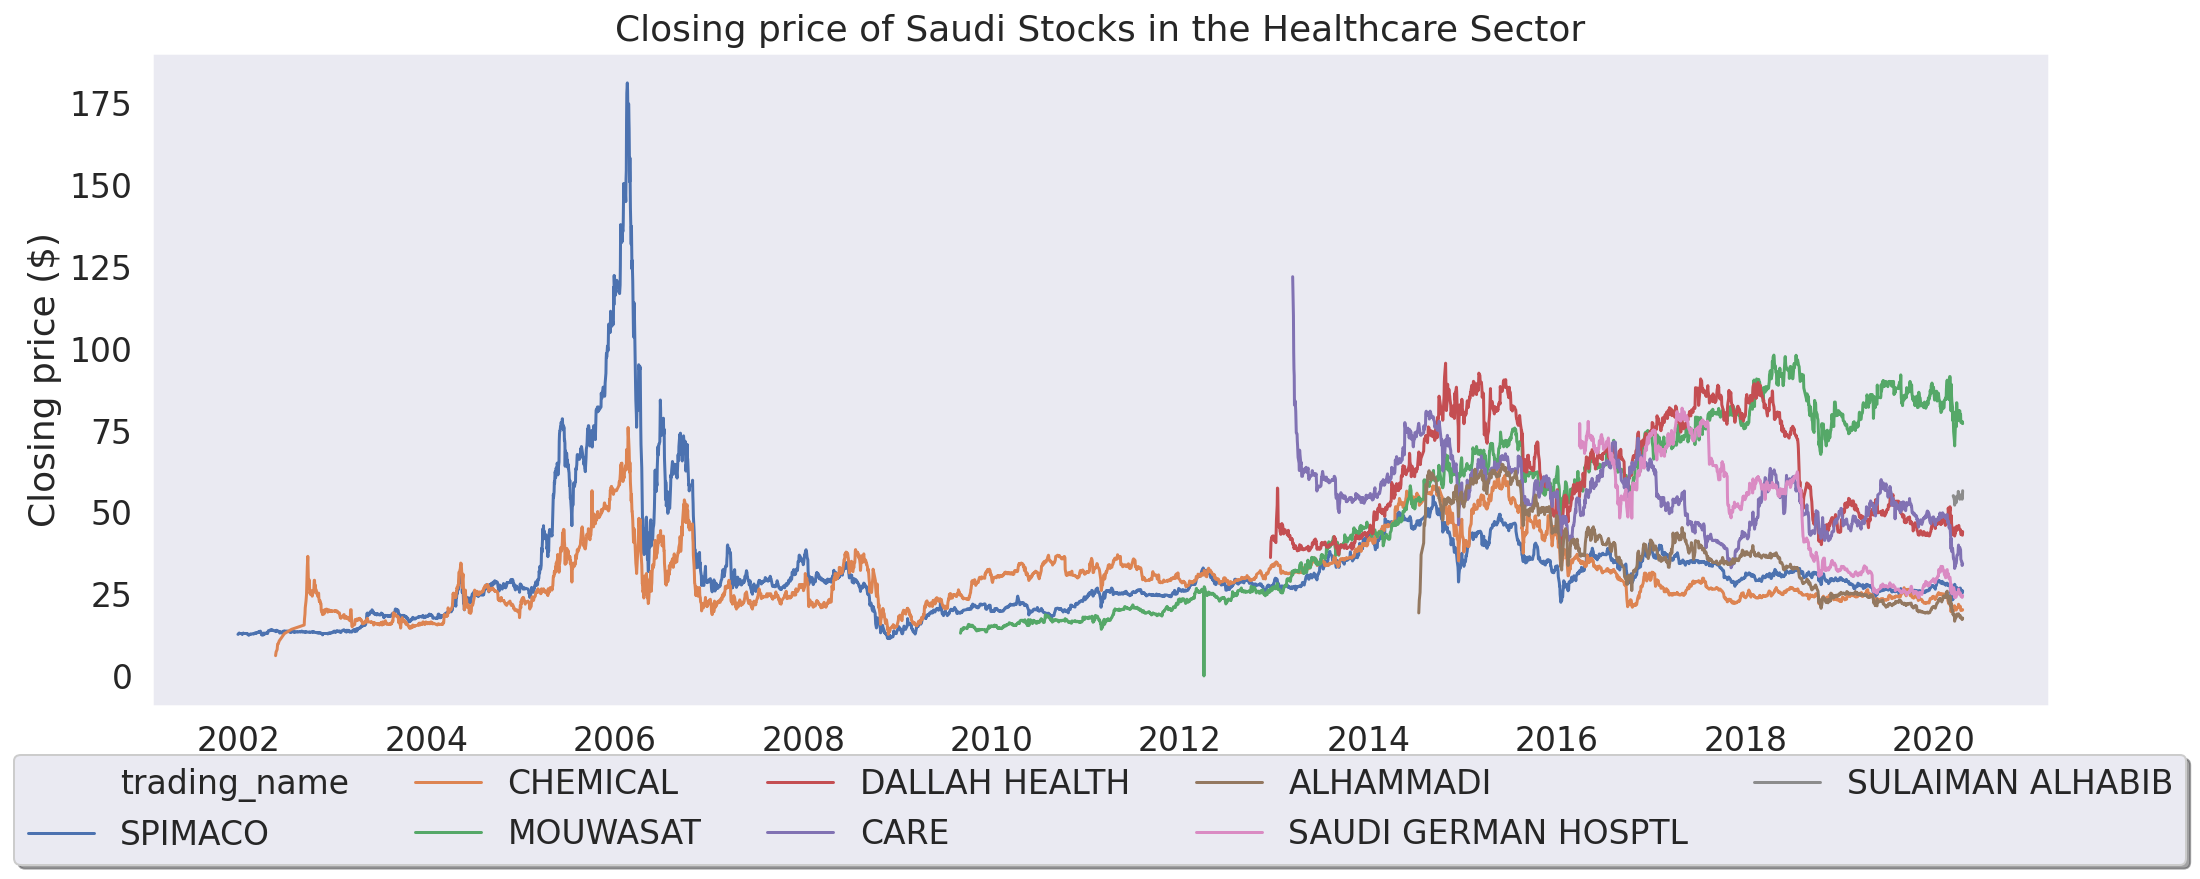

In [ ]:
plt.figure(figsize=(17, 6))
sns.lineplot(x=health_care.index, y="close", hue="trading_name", markers=True, data=health_care)
plt.title('Closing price of Saudi Stocks in the Healthcare Sector')
plt.ylabel('Closing price ($)')
plt.xlabel('Year')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.grid(False)
plt.show()

### From the graph above, we decided that we will do analysis will be done for CHEMICAL and SPIMACO as they are the oldest companies in healthcare sector.

In [ ]:
stocks[stocks['trading_name']=='CHEMICAL'].tail(1)

symbol                name trading_name      sectoer        date  \
364195    2230  Saudi Chemical Co.     CHEMICAL  Health Care  2002-05-26   

        open  high   low  close  change  perc_Change  volume_traded  \
364195  6.19  6.19  6.19   6.19    6.19          0.0        13604.0   

        value_traded  no_trades  
364195       82500.0        3.0

In [ ]:
stocks[stocks['trading_name']=='SPIMACO'].tail(1)

symbol                                               name  \
377509    2070  Saudi Pharmaceutical Industries and Medical Ap...   

       trading_name      sectoer        date  open  high   low  close  change  \
377509      SPIMACO  Health Care  2001-12-31  12.7  12.7  12.7  12.71   12.71   

        perc_Change  volume_traded  value_traded  no_trades  
377509          0.0       348149.0    4429461.75       44.0

### Just for fun: Checking the effects of COVID-19 on the saudi healthcare stock prices

In [ ]:
covid_19 = pd.read_csv('/kaggle/input/saudi-covid19-from-11-to-184/saudi_covid-19.csv', index_col='Date', parse_dates=['Date'])
covid_19.drop('Unnamed: 0',axis=1, inplace=True)
covid_19 = covid_19 [['ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex']]
covid_19.describe().T

count        mean          std  min    25%     50%     75%  \
ConfirmedCases   109.0  774.293578  1462.065411  1.0  143.0  143.00  392.00   
ConfirmedDeaths  109.0    7.972477    19.688057  0.0    0.0    0.00    0.00   
StringencyIndex  109.0   38.883211    39.547365  0.0    0.0   14.29   90.48   

                     max  
ConfirmedCases   7142.00  
ConfirmedDeaths    87.00  
StringencyIndex    95.24

In [ ]:
# The date that Saudi Arabia reported the first case of covid-19
covid_19[covid_19['ConfirmedCases']==1].head(1)

ConfirmedCases  ConfirmedDeaths  StringencyIndex
Date                                                        
2020-03-03             1.0              0.0            23.81

In [ ]:
# The date that Saudi Arabia closed everything and had the lockdown.
covid_19[covid_19['StringencyIndex']==covid_19.max()['StringencyIndex']].head(1)

ConfirmedCases  ConfirmedDeaths  StringencyIndex
Date                                                        
2020-03-25           767.0              1.0            95.24

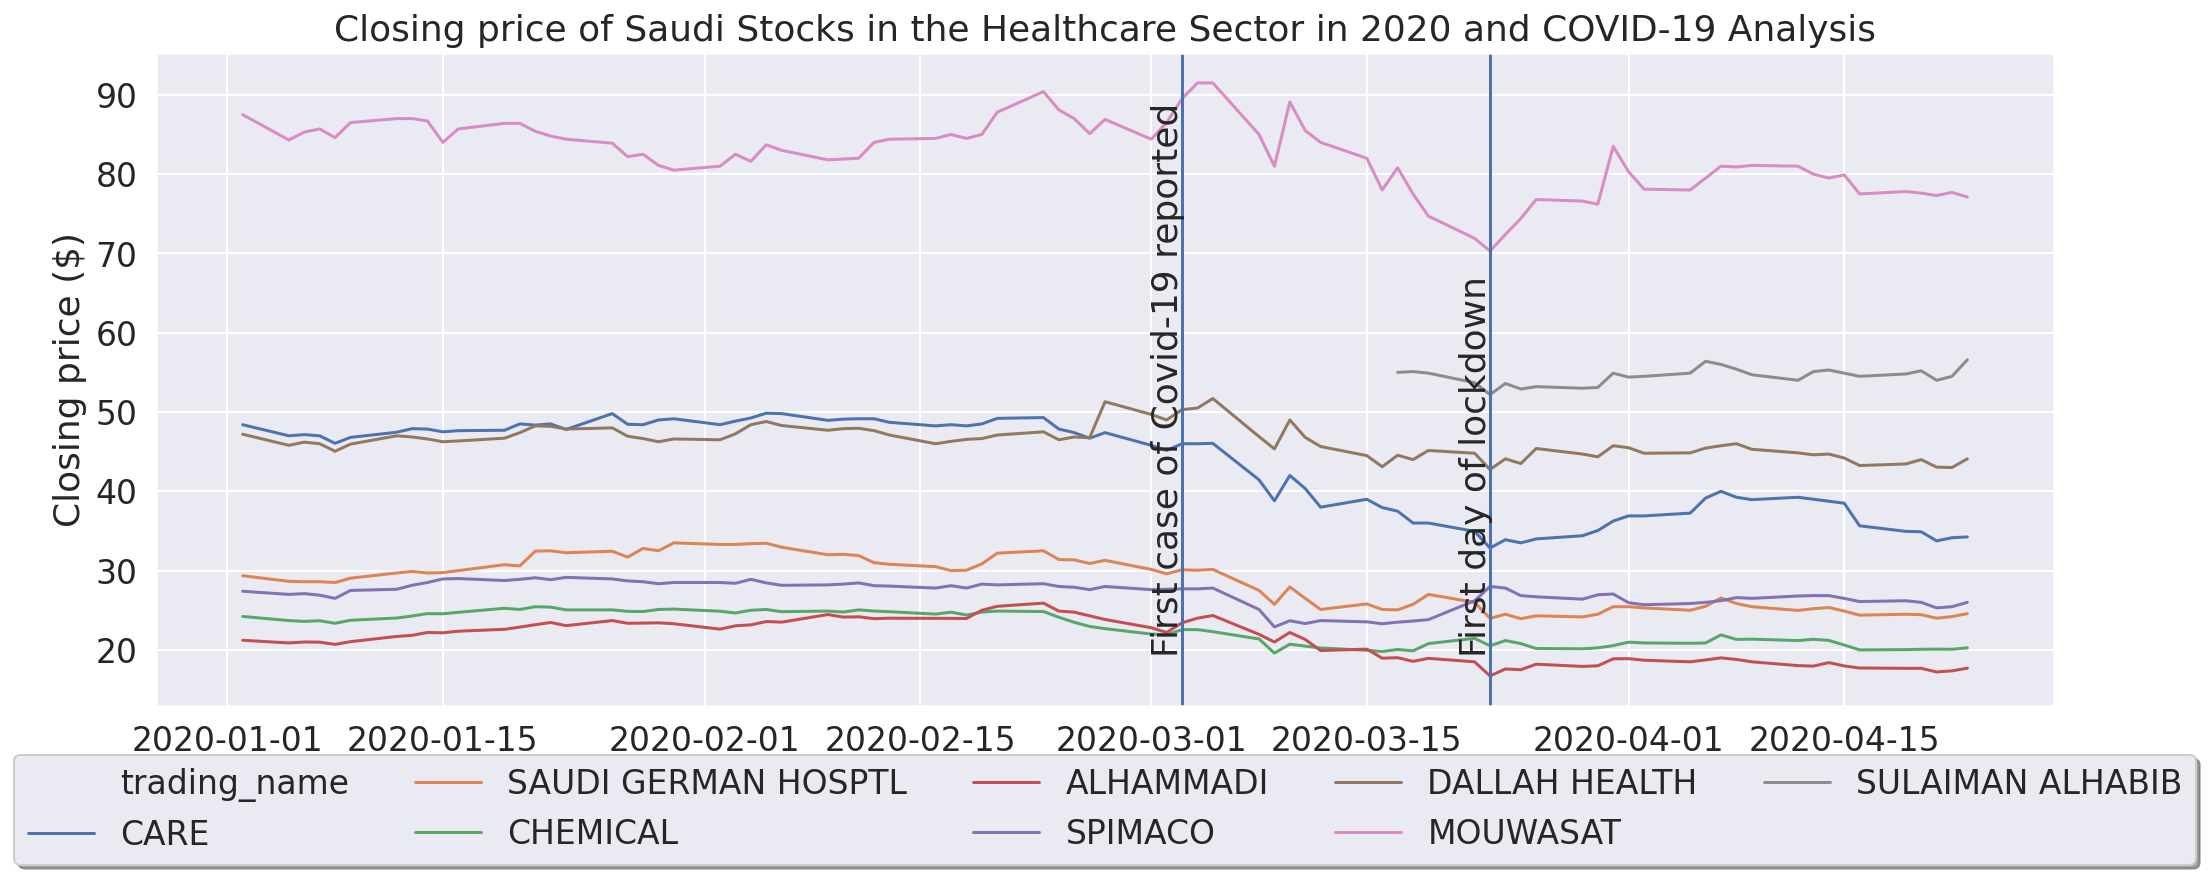

In [ ]:
health_care_2020 = health_care.loc[health_care.index>'2020-01-01']
plt.figure(figsize=(17, 6))
sns.lineplot(x=health_care_2020.index, y="close", hue="trading_name", markers=True, data=health_care_2020)
plt.title('Closing price of Saudi Stocks in the Healthcare Sector in 2020 and COVID-19 Analysis')
plt.ylabel('Closing price ($)')
plt.xlabel('Year')

plt.axvline(x= dt.datetime(2020,3,3))
plt.text(x=dt.datetime(2020,3,1),y=20,s='First case of Covid-19 reported',rotation=90)
plt.axvline(x=dt.datetime(2020,3,23))
plt.text(x=dt.datetime(2020,3,21),y=20,s='First day of lockdown',rotation=90)


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.grid(True)
plt.show()

- we can actually see the effect of covid-19 on stock market, as the closing prices decreased in almost all companies after the first case of covid-19 was reported in saudi
- After the first day of lockdown, I was expecting another drop in prices, but we cannot see that in the graph. prices actually were not affected.

## CHEMICAL vs. SPIMACO

In [ ]:
CHEMICAL_df = stocks[stocks['trading_name']=='CHEMICAL']
CHEMICAL_df['date']= pd.to_datetime(CHEMICAL_df['date'])
CHEMICAL_df.sort_values('date', inplace=True)
CHEMICAL_df = CHEMICAL_df.set_index('date')
CHEMICAL_df.drop('symbol',axis=1).describe().T

count          mean           std    min          25%  \
open           4561.0  3.042611e+01  1.050868e+01   6.19       23.540   
high           4561.0  3.089185e+01  1.070362e+01   6.19       23.860   
low            4561.0  2.999361e+01  1.031692e+01   6.19       23.240   
close          4576.0  3.041530e+01  1.052508e+01   6.19       23.540   
change         4576.0  4.427448e-03  8.569923e-01  -5.62       -0.230   
perc_Change    4576.0  6.202579e-02  2.686469e+00 -10.51       -0.890   
volume_traded  4576.0  1.683380e+06  3.126146e+06   0.00   154120.000   
value_traded   4576.0  5.663043e+07  1.301171e+08   0.00  4375182.625   
no_trades      4576.0  8.799423e+02  1.725926e+03   0.00      128.000   

                        50%           75%           max  
open           2.842000e+01  3.464000e+01  7.404000e+01  
high           2.887000e+01  3.505000e+01  7.742000e+01  
low            2.812000e+01  3.427000e+01  6.992000e+01  
close          2.849000e+01  3.451250e+01  7.592000e+01  
change         0.000000e+00  2.800000e-01  6.940000e+00  
perc_Change    0.000000e+00  9.500000e-01  1.166000e+01  
volume_traded  4.325075e+05  1.669586e+06  4.199947e+07  
value_traded   1.373389e+07  4.478998e+07  1.955718e+09  
no_trades      2.715000e+02  7.675000e+02  1.916700e+04

In [ ]:
SPIMACO_df = stocks[stocks['trading_name']=='SPIMACO']
SPIMACO_df['date']= pd.to_datetime(SPIMACO_df['date'])
SPIMACO_df.sort_values('date', inplace=True)
SPIMACO_df = SPIMACO_df.set_index('date')
SPIMACO_df.drop('symbol',axis=1).describe().T

count          mean           std       min          25%  \
open           4791.0  3.214230e+01  1.880812e+01     11.40       21.925   
high           4791.0  3.265931e+01  1.939112e+01     11.65       22.150   
low            4791.0  3.170860e+01  1.837276e+01     10.95       21.700   
close          4793.0  3.219091e+01  1.893619e+01     11.41       21.960   
change         4793.0  5.409973e-03  1.185412e+00     -9.48       -0.220   
perc_Change    4793.0  4.326935e-02  2.378981e+00    -10.68       -0.880   
volume_traded  4793.0  1.209246e+06  2.231894e+06    832.00   126229.000   
value_traded   4793.0  5.024773e+07  1.201224e+08  21356.60  3159362.750   
no_trades      4793.0  5.961216e+02  1.118550e+03      1.00       97.000   

                     50%          75%           max  
open                28.2        35.10  1.832500e+02  
high                28.7        35.60  1.852500e+02  
low                 27.9        34.80  1.737500e+02  
close               28.3        35.20  1.812200e+02  
change               0.0         0.26  1.536000e+01  
perc_Change          0.0         0.95  1.373000e+01  
volume_traded   335347.0   1147143.00  2.976397e+07  
value_traded   8642240.7  34436863.60  1.736090e+09  
no_trades          203.0       518.00  1.068000e+04

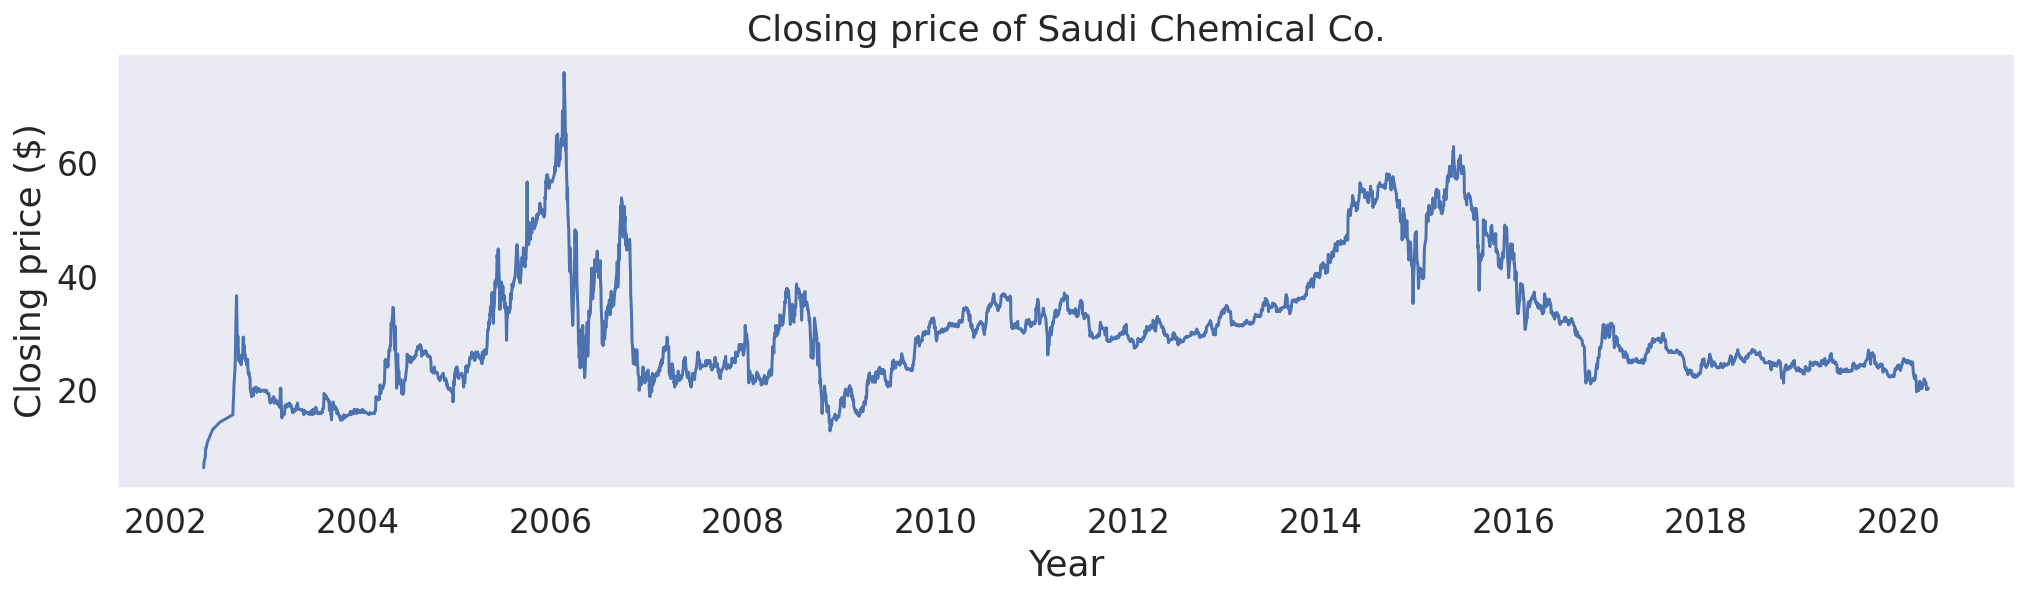

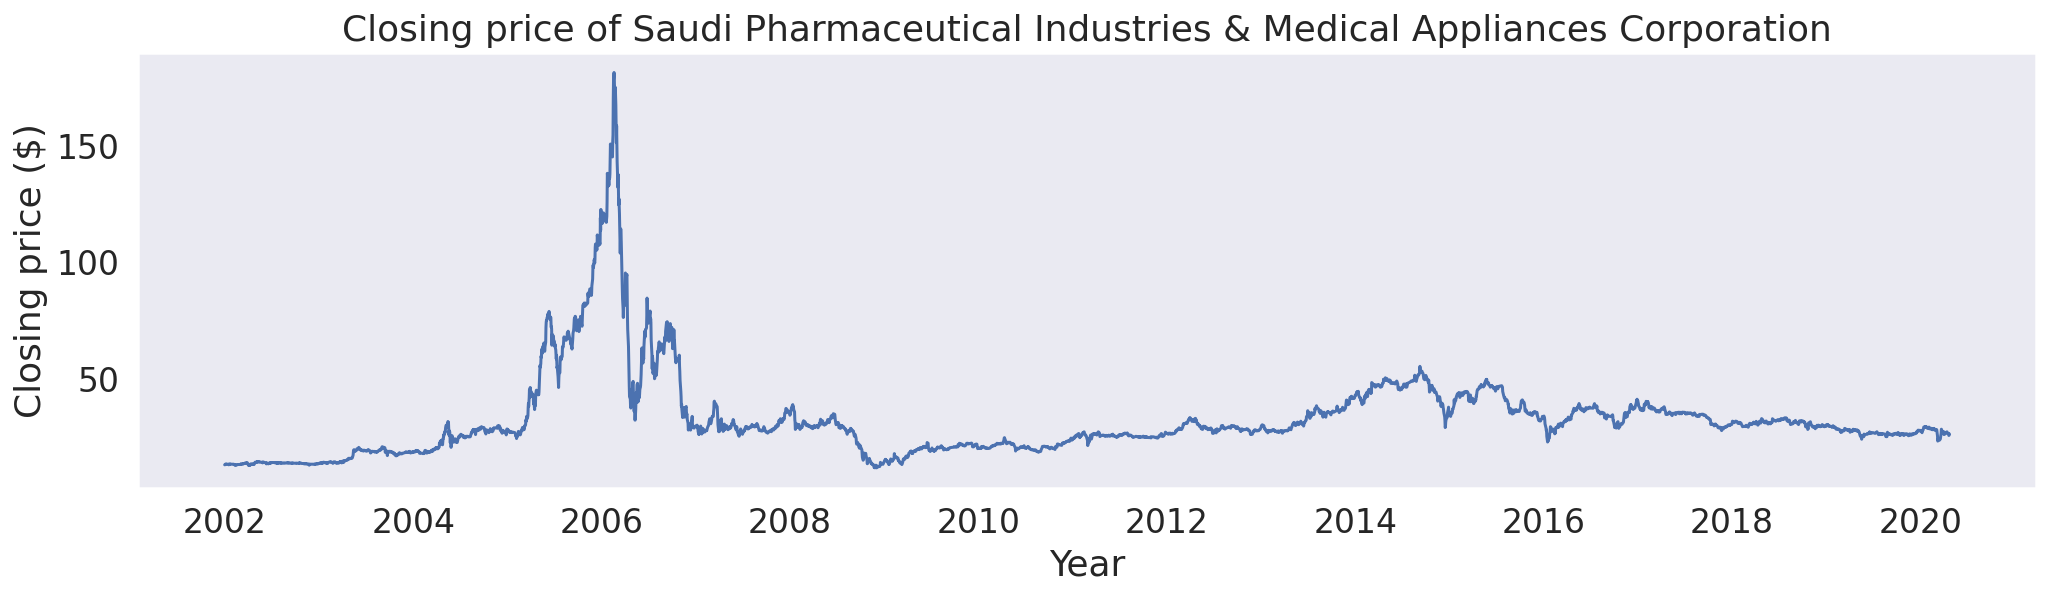

In [ ]:
plt.figure(figsize=(17, 4))
plt.plot(CHEMICAL_df['close'])
plt.title('Closing price of Saudi Chemical Co.')
plt.ylabel('Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

plt.figure(figsize=(17, 4))
plt.plot(SPIMACO_df['close'])
plt.title('Closing price of Saudi Pharmaceutical Industries & Medical Appliances Corporation')
plt.ylabel('Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window = window).mean()
    resample_mean = series.resample('Y').mean()

    plt.figure(figsize=(17,6))
    plt.title('Moving Average for ')
    plt.plot(series[window:], label='Actual values')
    plt.plot(rolling_mean, 'g', label='Rolling mean trend window size = {}'.format(window) , linewidth=4.0)
    plt.plot(resample_mean, 'black', label='Yearly Resample mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')


    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    plt.grid(True)

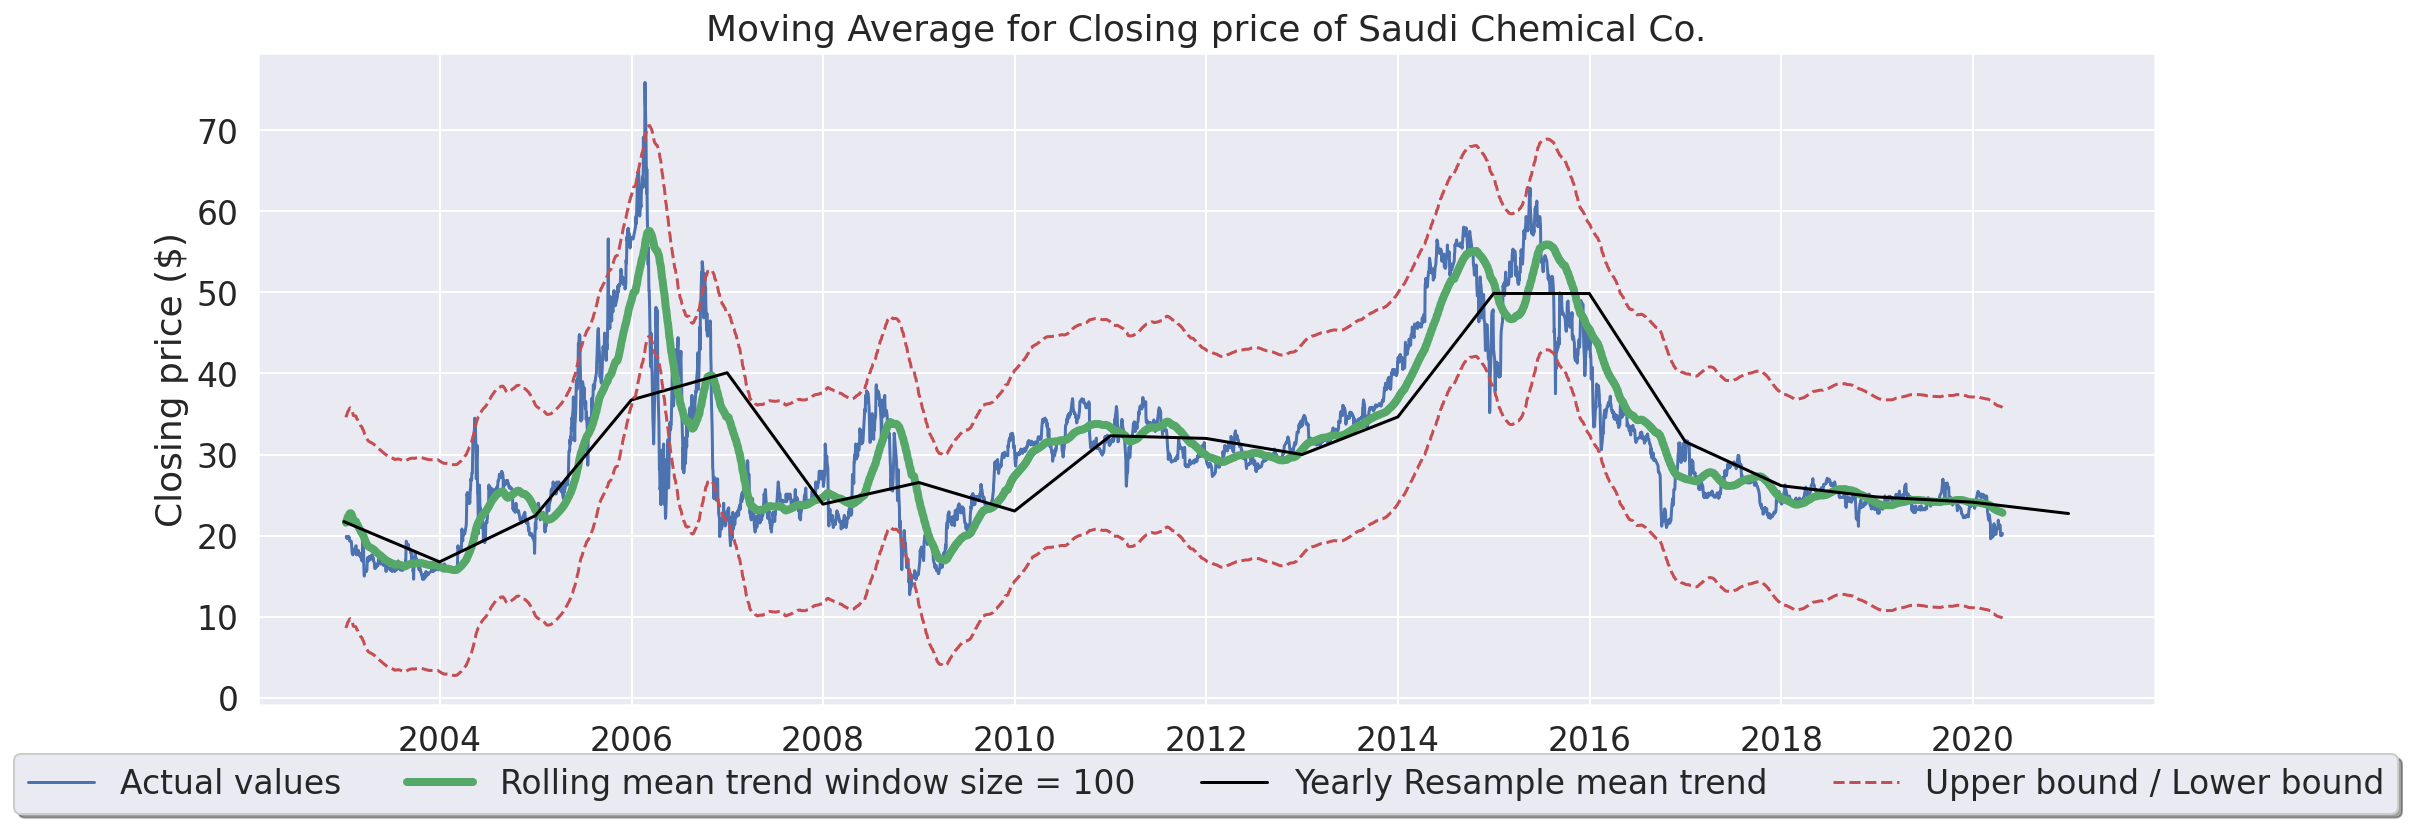

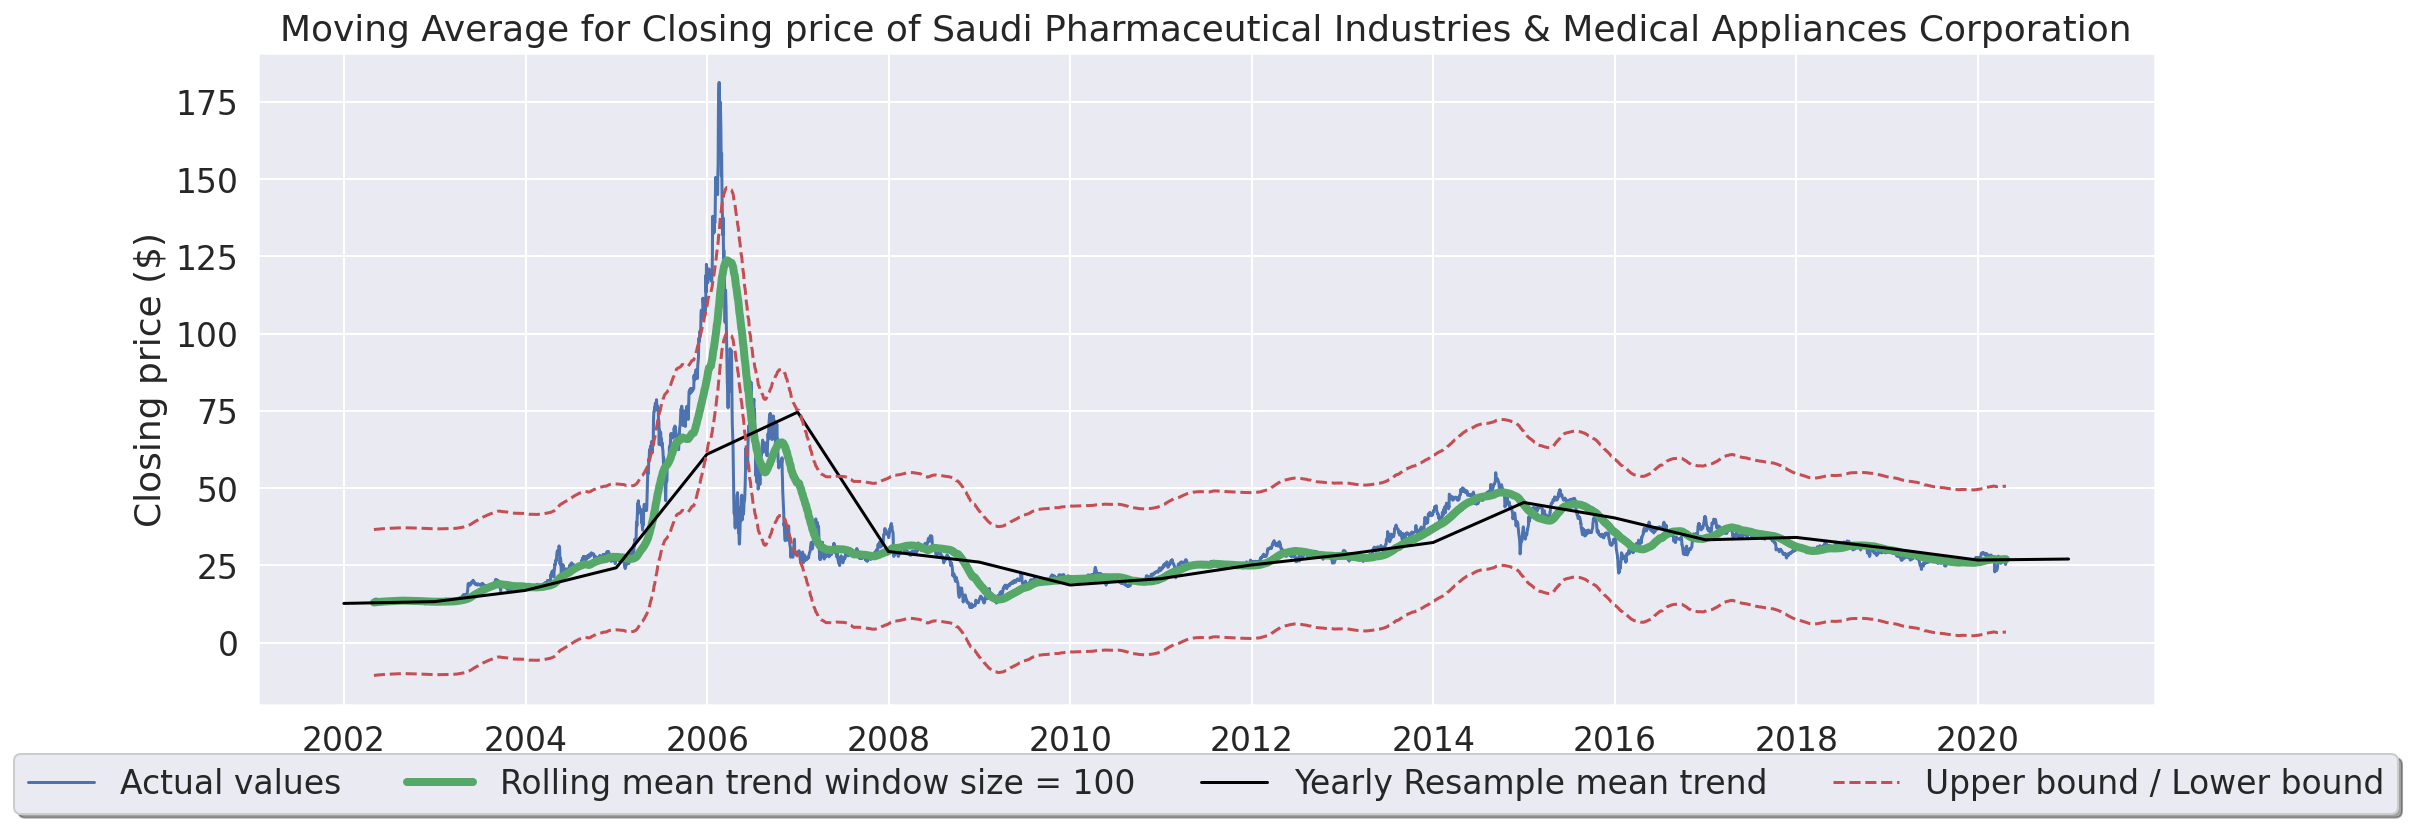

In [ ]:
#Smooth by previous quarter (90 days)
plot_moving_average(CHEMICAL_df['close'], 100, plot_intervals=True)
plt.ylabel('Closing price ($)')
plt.title ('Moving Average for Closing price of Saudi Chemical Co.');

#Smooth by previous quarter (90 days)
plot_moving_average(SPIMACO_df['close'], 100, plot_intervals=True)
plt.ylabel('Closing price ($)')
plt.title ('Moving Average for Closing price of Saudi Pharmaceutical Industries & Medical Appliances Corporation');

In [ ]:
# I think that there is something wrong because I don't think that the data looks stationary,
# but the p-value is smaller than 0.05!
# why?
print(BOLD + 'CHEMICAL' +END)
result = adfuller(CHEMICAL_df['close'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('p_value < 0.05 , that means the series is stationary\n')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

print('\n' + BOLD + 'SPIMACO' +END)
result = adfuller(SPIMACO_df['close'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('p_value < 0.05 , that means the series is stationary\n')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

CHEMICAL
ADF Statistic: -2.912695310392124
p-value: 0.04389149772353575
p_value < 0.05 , that means the series is stationary

Critial Values:
   1%, -3.4317864410558903
Critial Values:
   5%, -2.86217473797098
Critial Values:
   10%, -2.567107874135008

SPIMACO
ADF Statistic: -3.4377887615326204
p-value: 0.00973616176240766
p_value < 0.05 , that means the series is stationary

Critial Values:
   1%, -3.4317245441126865
Critial Values:
   5%, -2.862147393122474
Critial Values:
   10%, -2.567093317253372


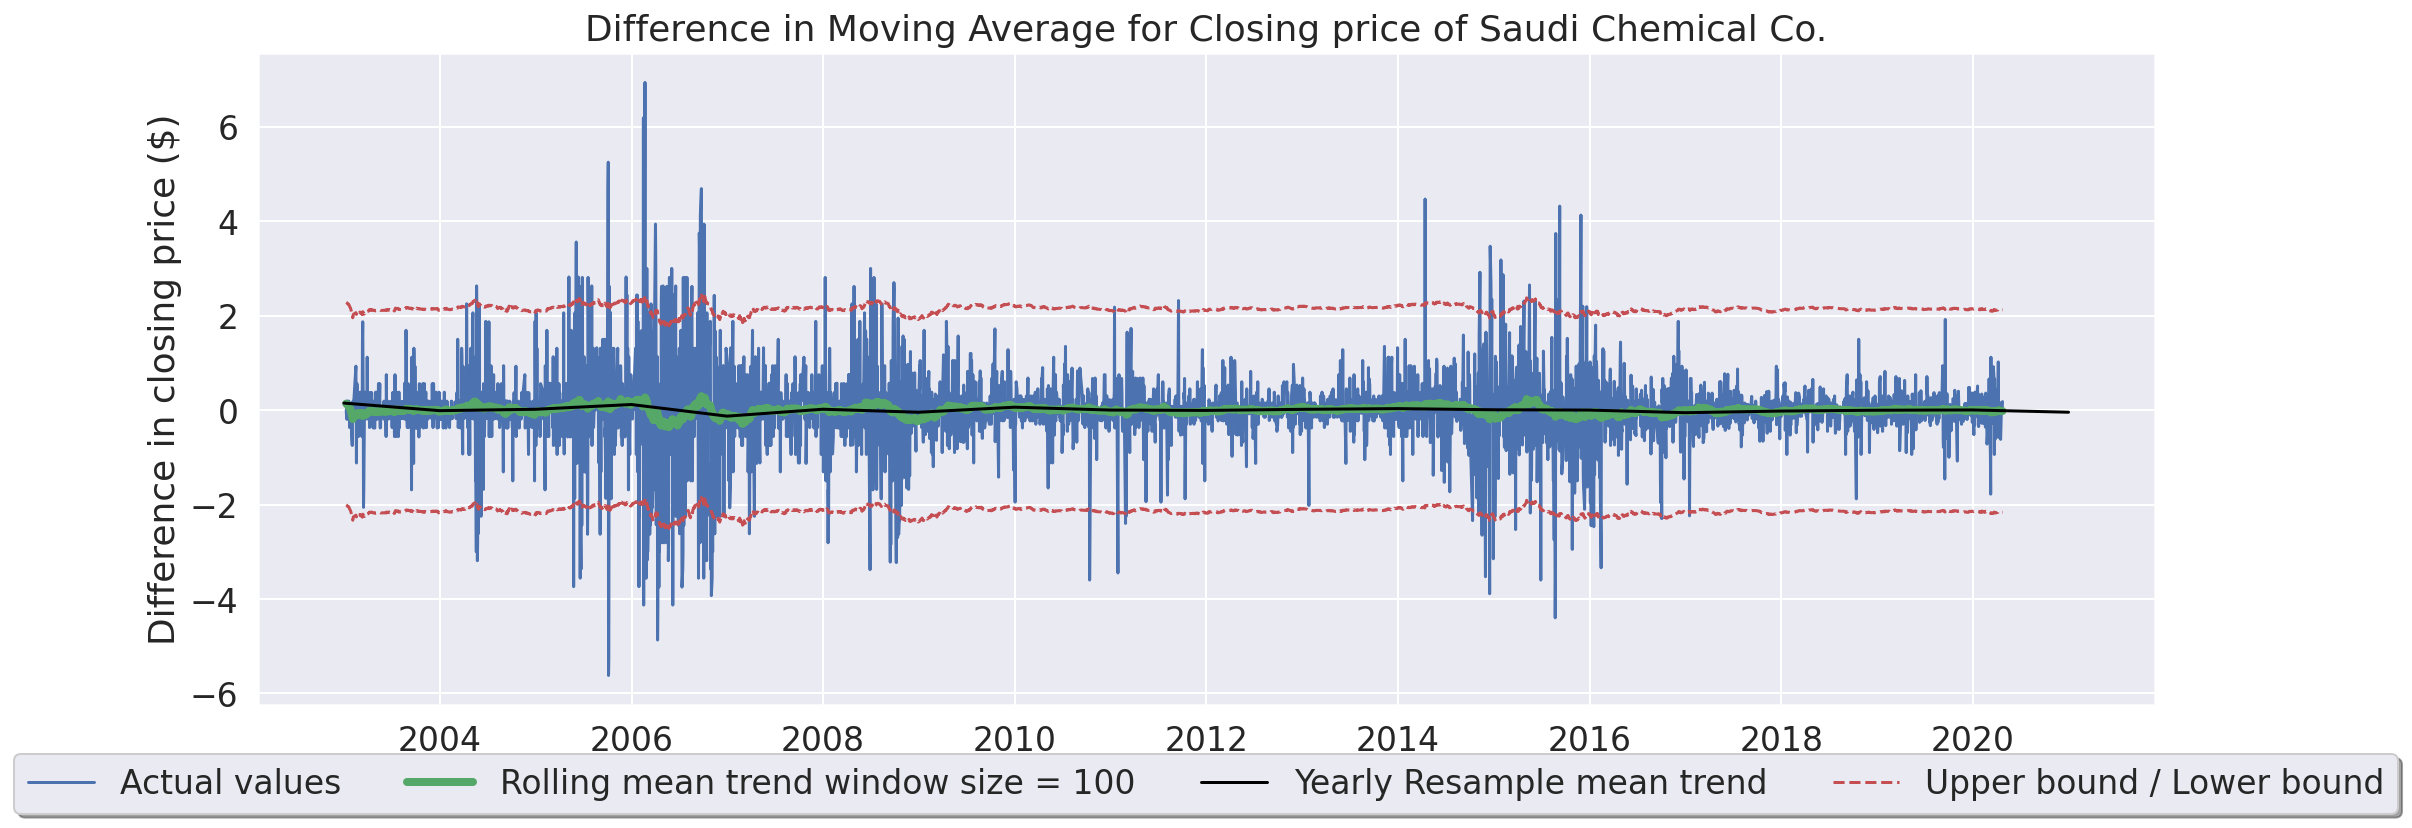

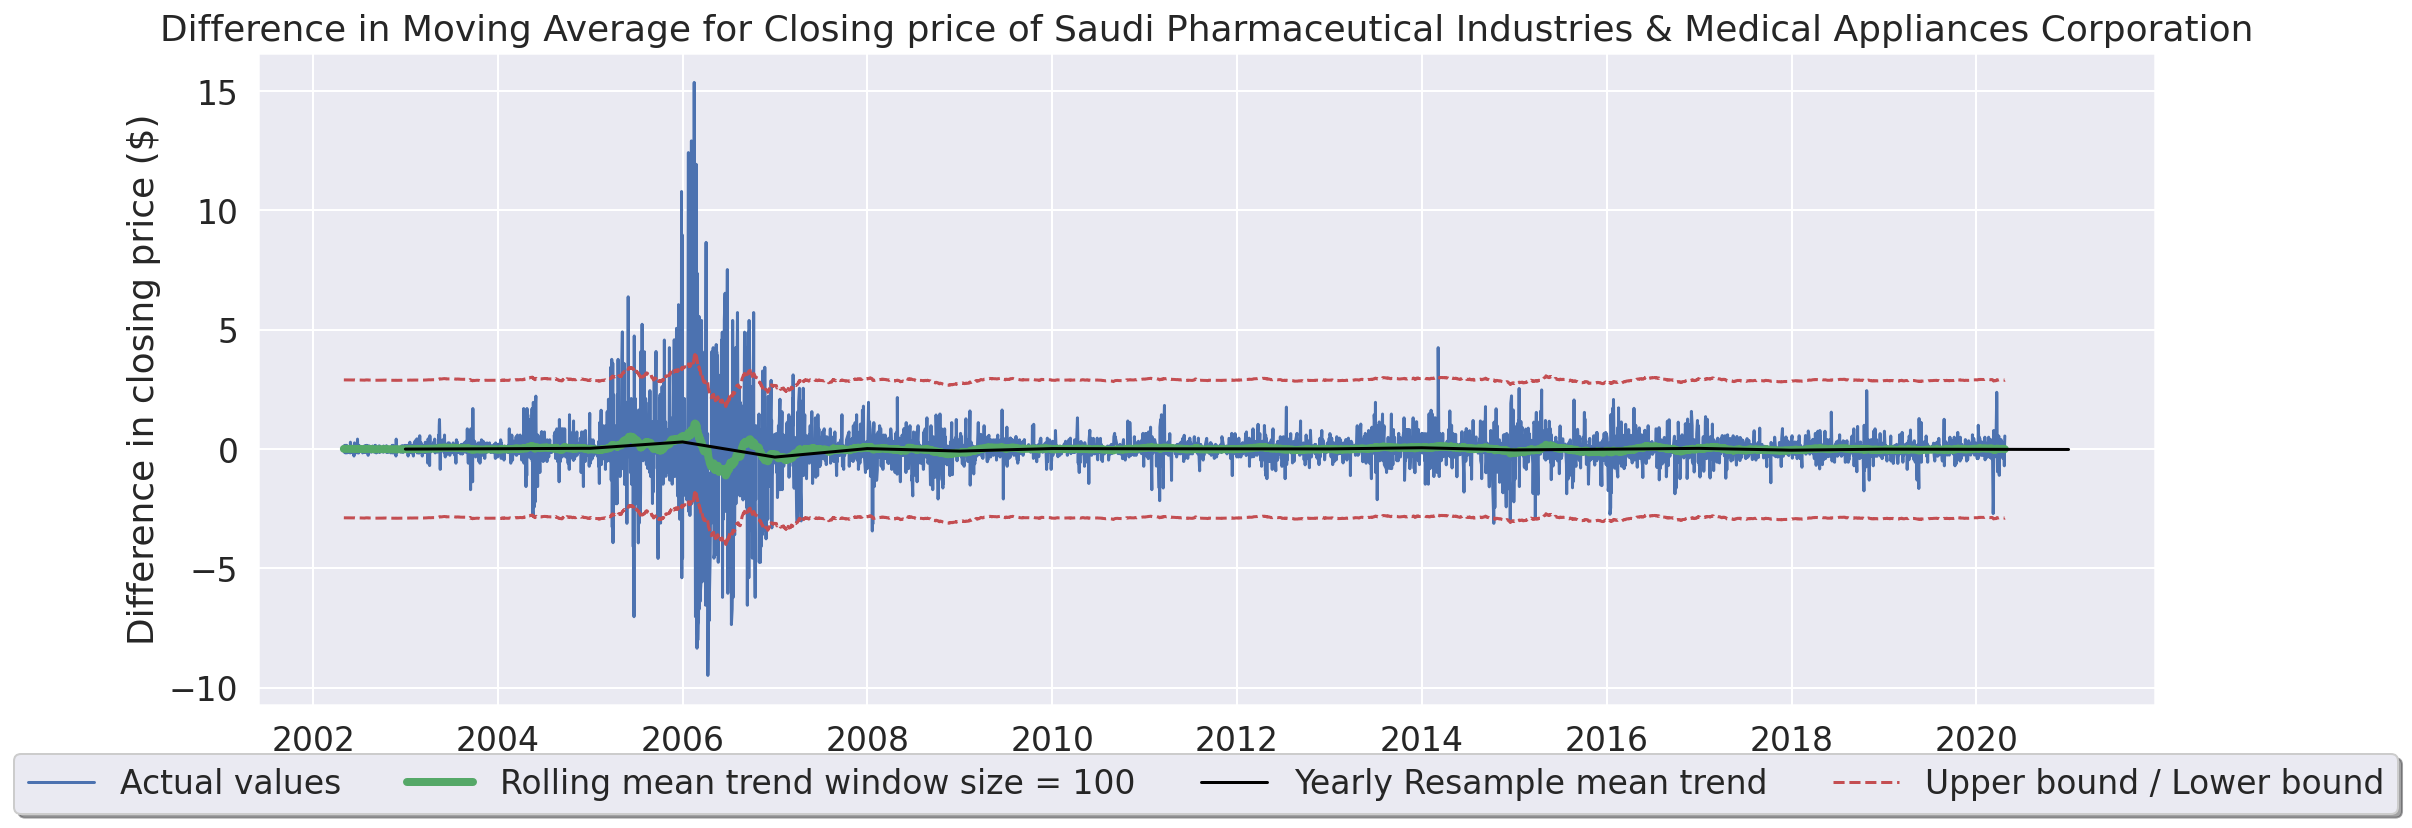

In [ ]:
CHEMICAL_df['close_diff'] = CHEMICAL_df['close'].diff()
plot_moving_average(CHEMICAL_df['close_diff'], 100, plot_intervals=True)
plt.ylabel('Difference in closing price ($)')
plt.title ('Difference in Moving Average for Closing price of Saudi Chemical Co.');

SPIMACO_df['close_diff'] = SPIMACO_df['close'].diff()
plot_moving_average(SPIMACO_df['close_diff'], 100, plot_intervals=True)
plt.ylabel('Difference in closing price ($)')
plt.title ('Difference in Moving Average for Closing price of Saudi Pharmaceutical Industries & Medical Appliances Corporation');

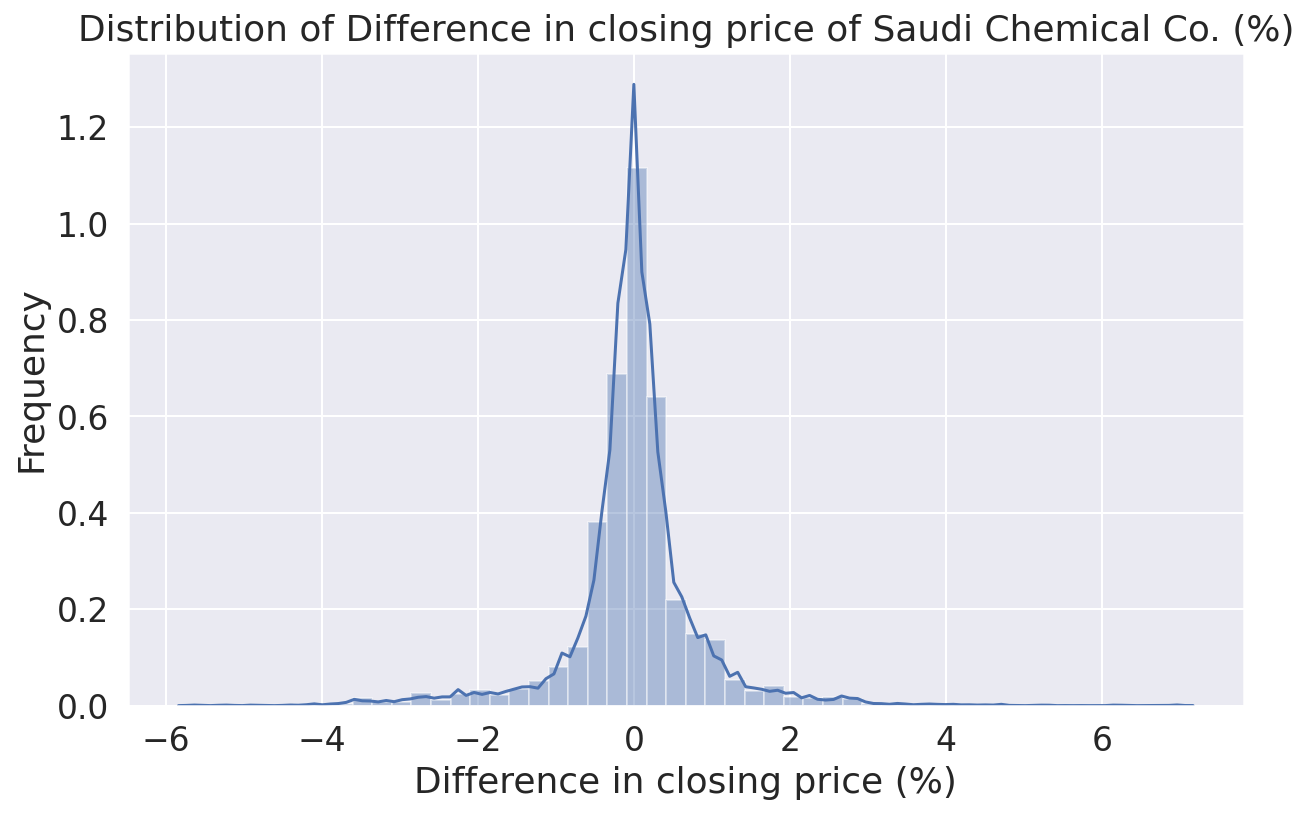

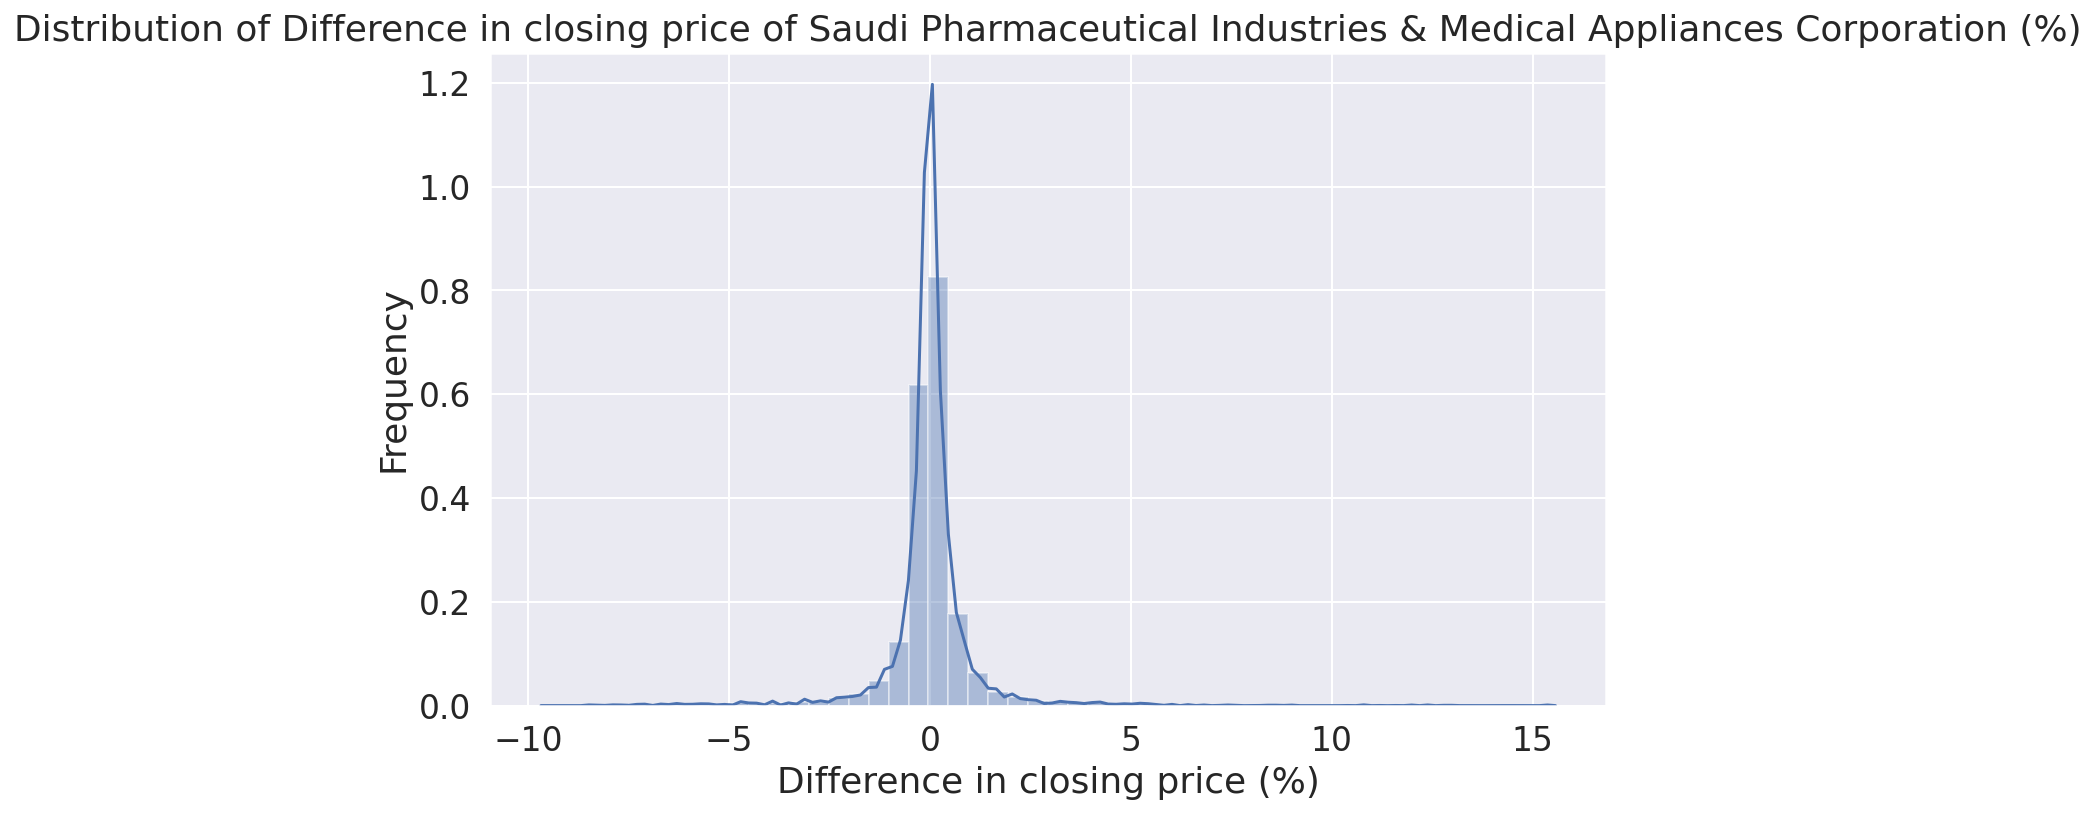

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(CHEMICAL_df['close_diff'].dropna())
plt.title('Distribution of Difference in closing price of Saudi Chemical Co. (%)')
plt.ylabel('Frequency')
plt.xlabel('Difference in closing price (%)')
plt.show()

plt.figure(figsize=(10, 6))
sns.distplot(SPIMACO_df['close_diff'].dropna())
plt.title('Distribution of Difference in closing price of Saudi Pharmaceutical Industries & Medical Appliances Corporation (%)')
plt.ylabel('Frequency')
plt.xlabel('Difference in closing price (%)')
plt.show()

In [ ]:
print(BOLD + 'CHEMICAL' +END)
result = adfuller(CHEMICAL_df['close_diff'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('p_value < 0.05 , that means the series is stationary\n')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

print('\n'+ BOLD + 'SPIMACO' +END)
result = adfuller(SPIMACO_df['close_diff'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('p_value < 0.05 , that means the series is stationary\n')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


CHEMICAL
ADF Statistic: -15.694636654353978
p-value: 1.4200495660248404e-28
p_value < 0.05 , that means the series is stationary

Critial Values:
   1%, -3.4317864410558903
Critial Values:
   5%, -2.86217473797098
Critial Values:
   10%, -2.567107874135008

SPIMACO
ADF Statistic: -11.353108086824268
p-value: 9.883516253643833e-21
p_value < 0.05 , that means the series is stationary

Critial Values:
   1%, -3.431724833099153
Critial Values:
   5%, -2.8621475207923153
Critial Values:
   10%, -2.5670933852174938


In [ ]:
CHEMICAL_df['close'].autocorr()

0.9967207159607027

In [ ]:
SPIMACO_df['close'].autocorr()

0.9980873503199306

In [ ]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(15, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

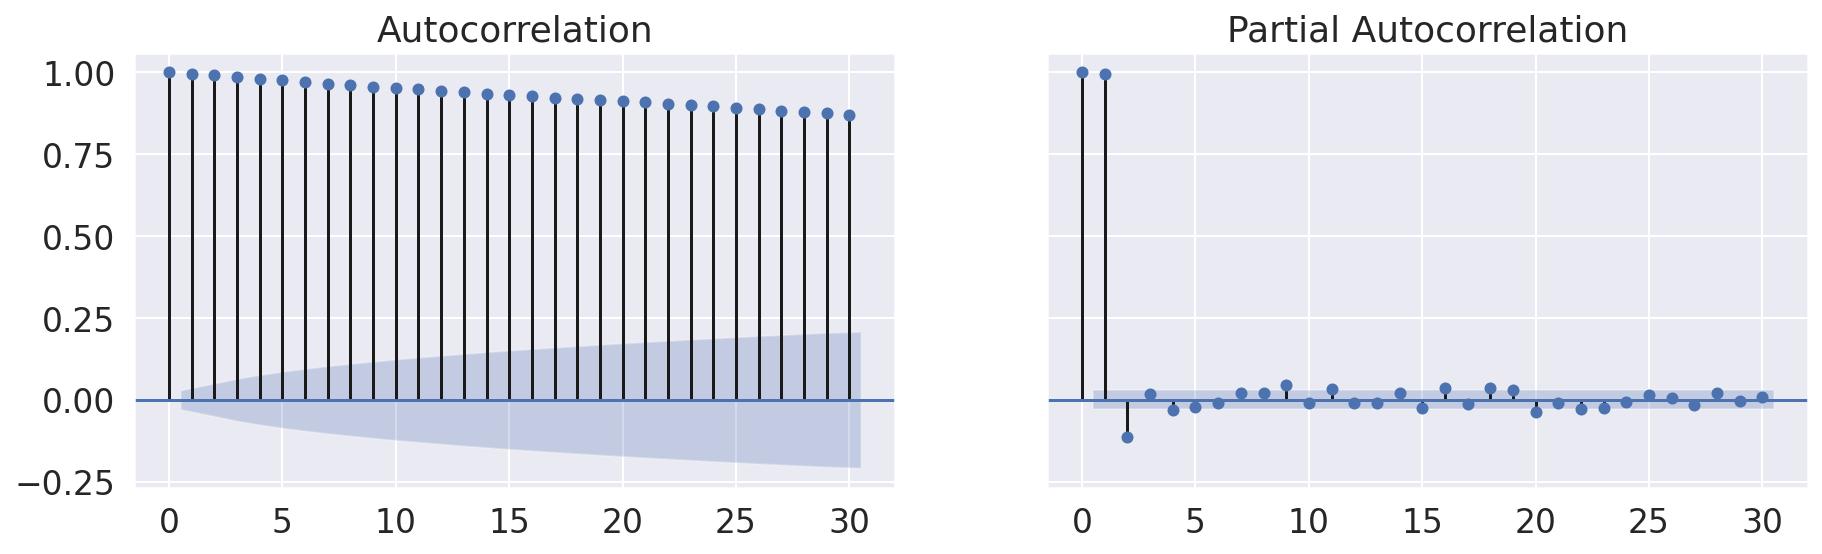

In [ ]:
fig, ax = autocorr_plots(CHEMICAL_df['close'],lags=30)

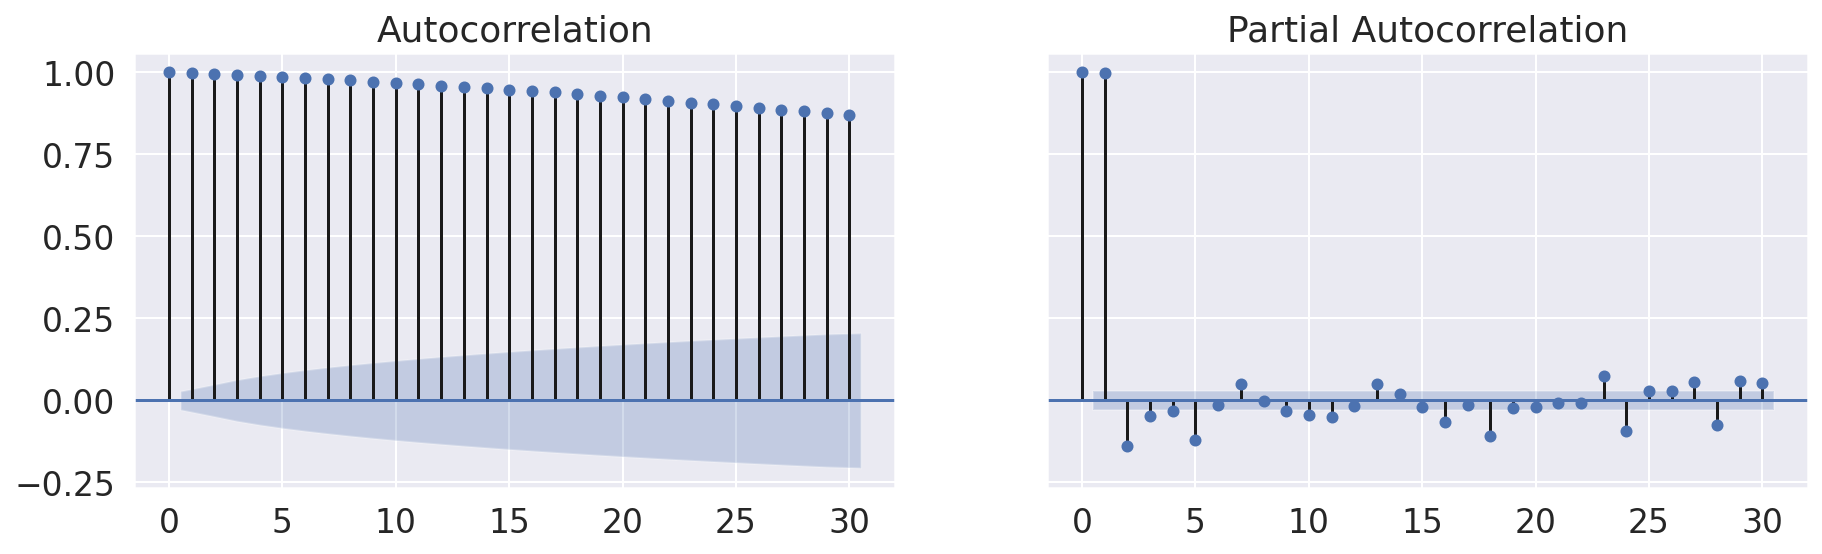

In [ ]:
fig, ax = autocorr_plots(SPIMACO_df['close'],lags=30)

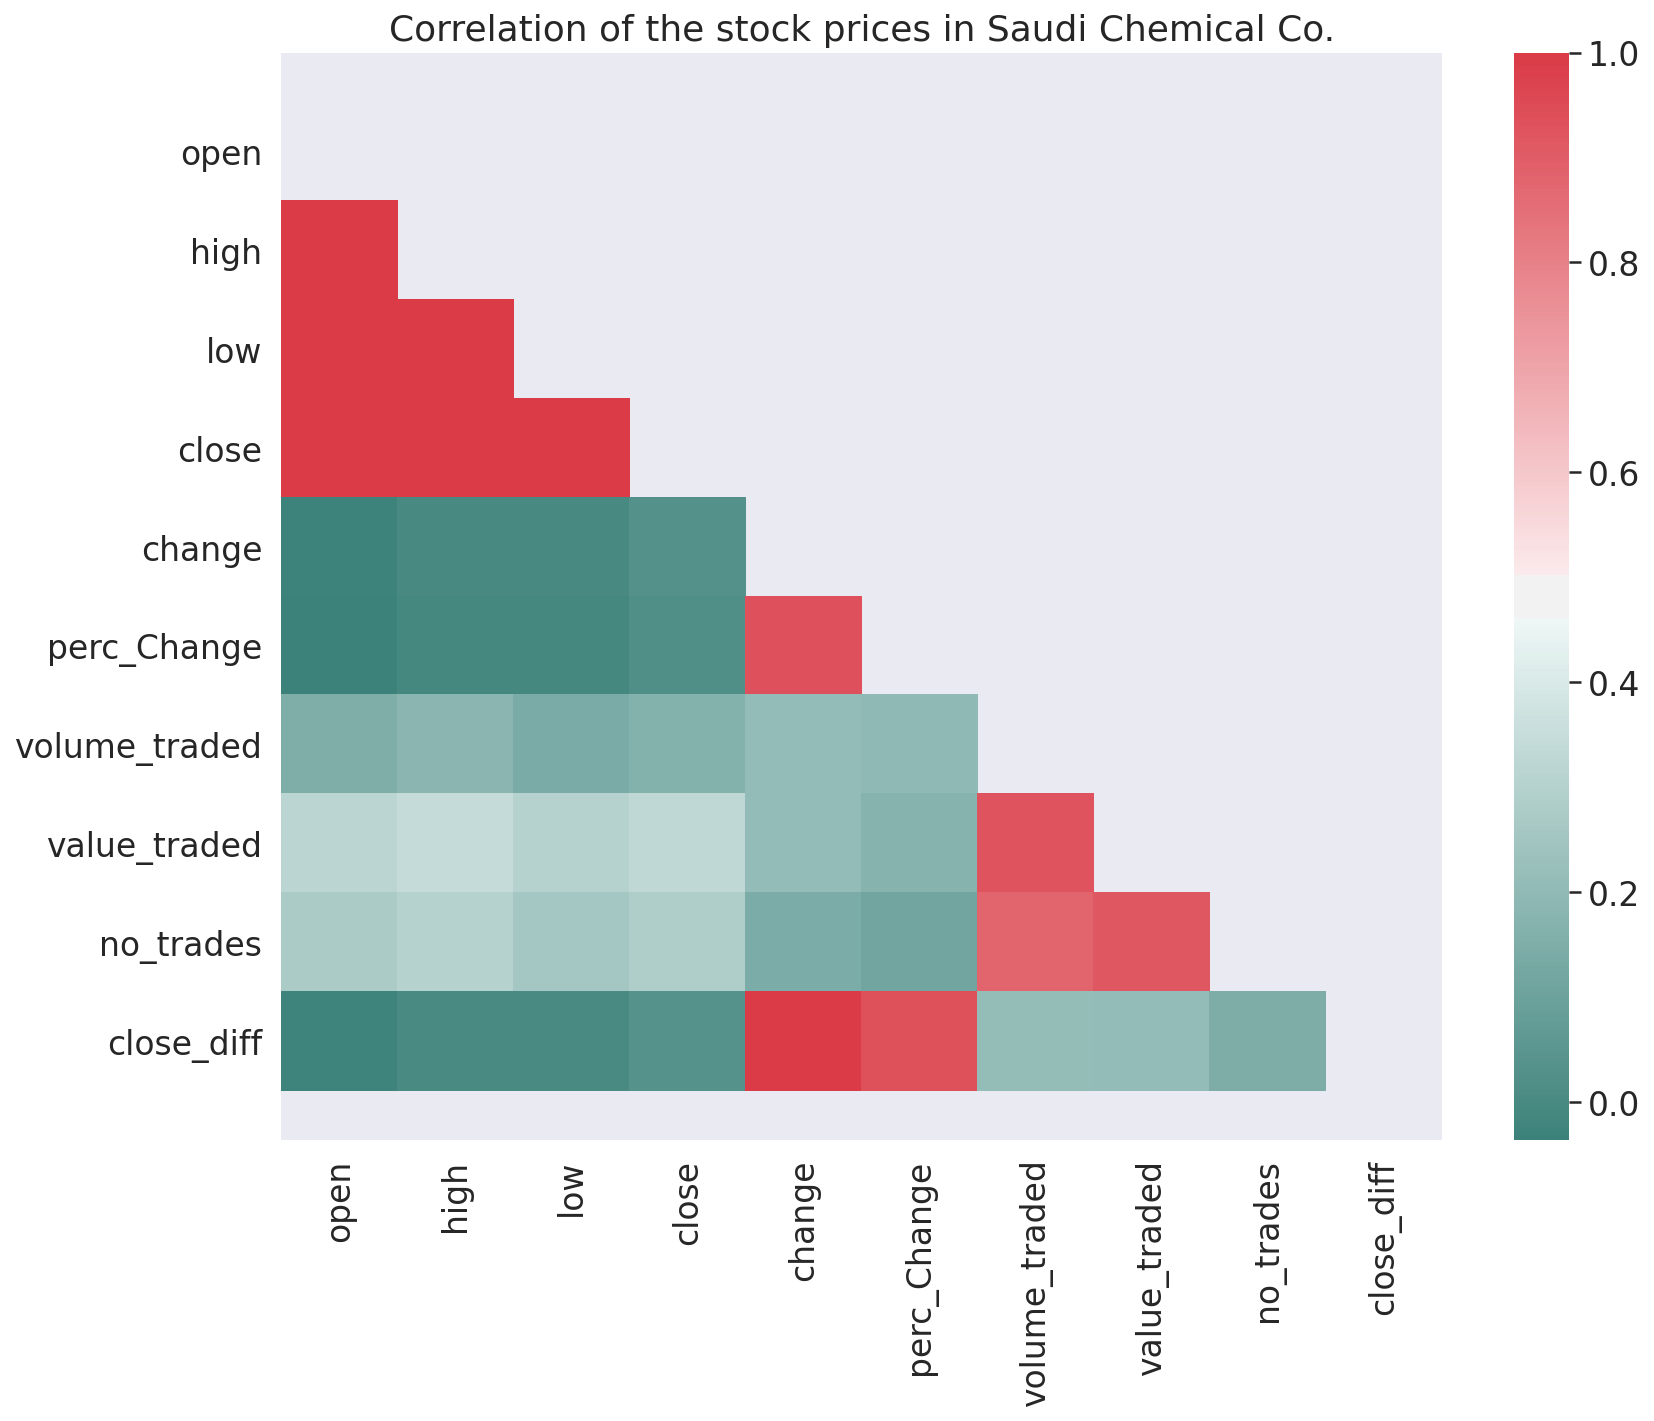

In [ ]:
corr_CHEMICAL_df = CHEMICAL_df.drop('symbol', axis=1).corr()
fig, axs = plt.subplots(figsize = (13, 10))
mask = np.triu(np.ones_like(corr_CHEMICAL_df, dtype = np.bool))
sns.heatmap(corr_CHEMICAL_df, ax = axs, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation of the stock prices in Saudi Chemical Co.')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

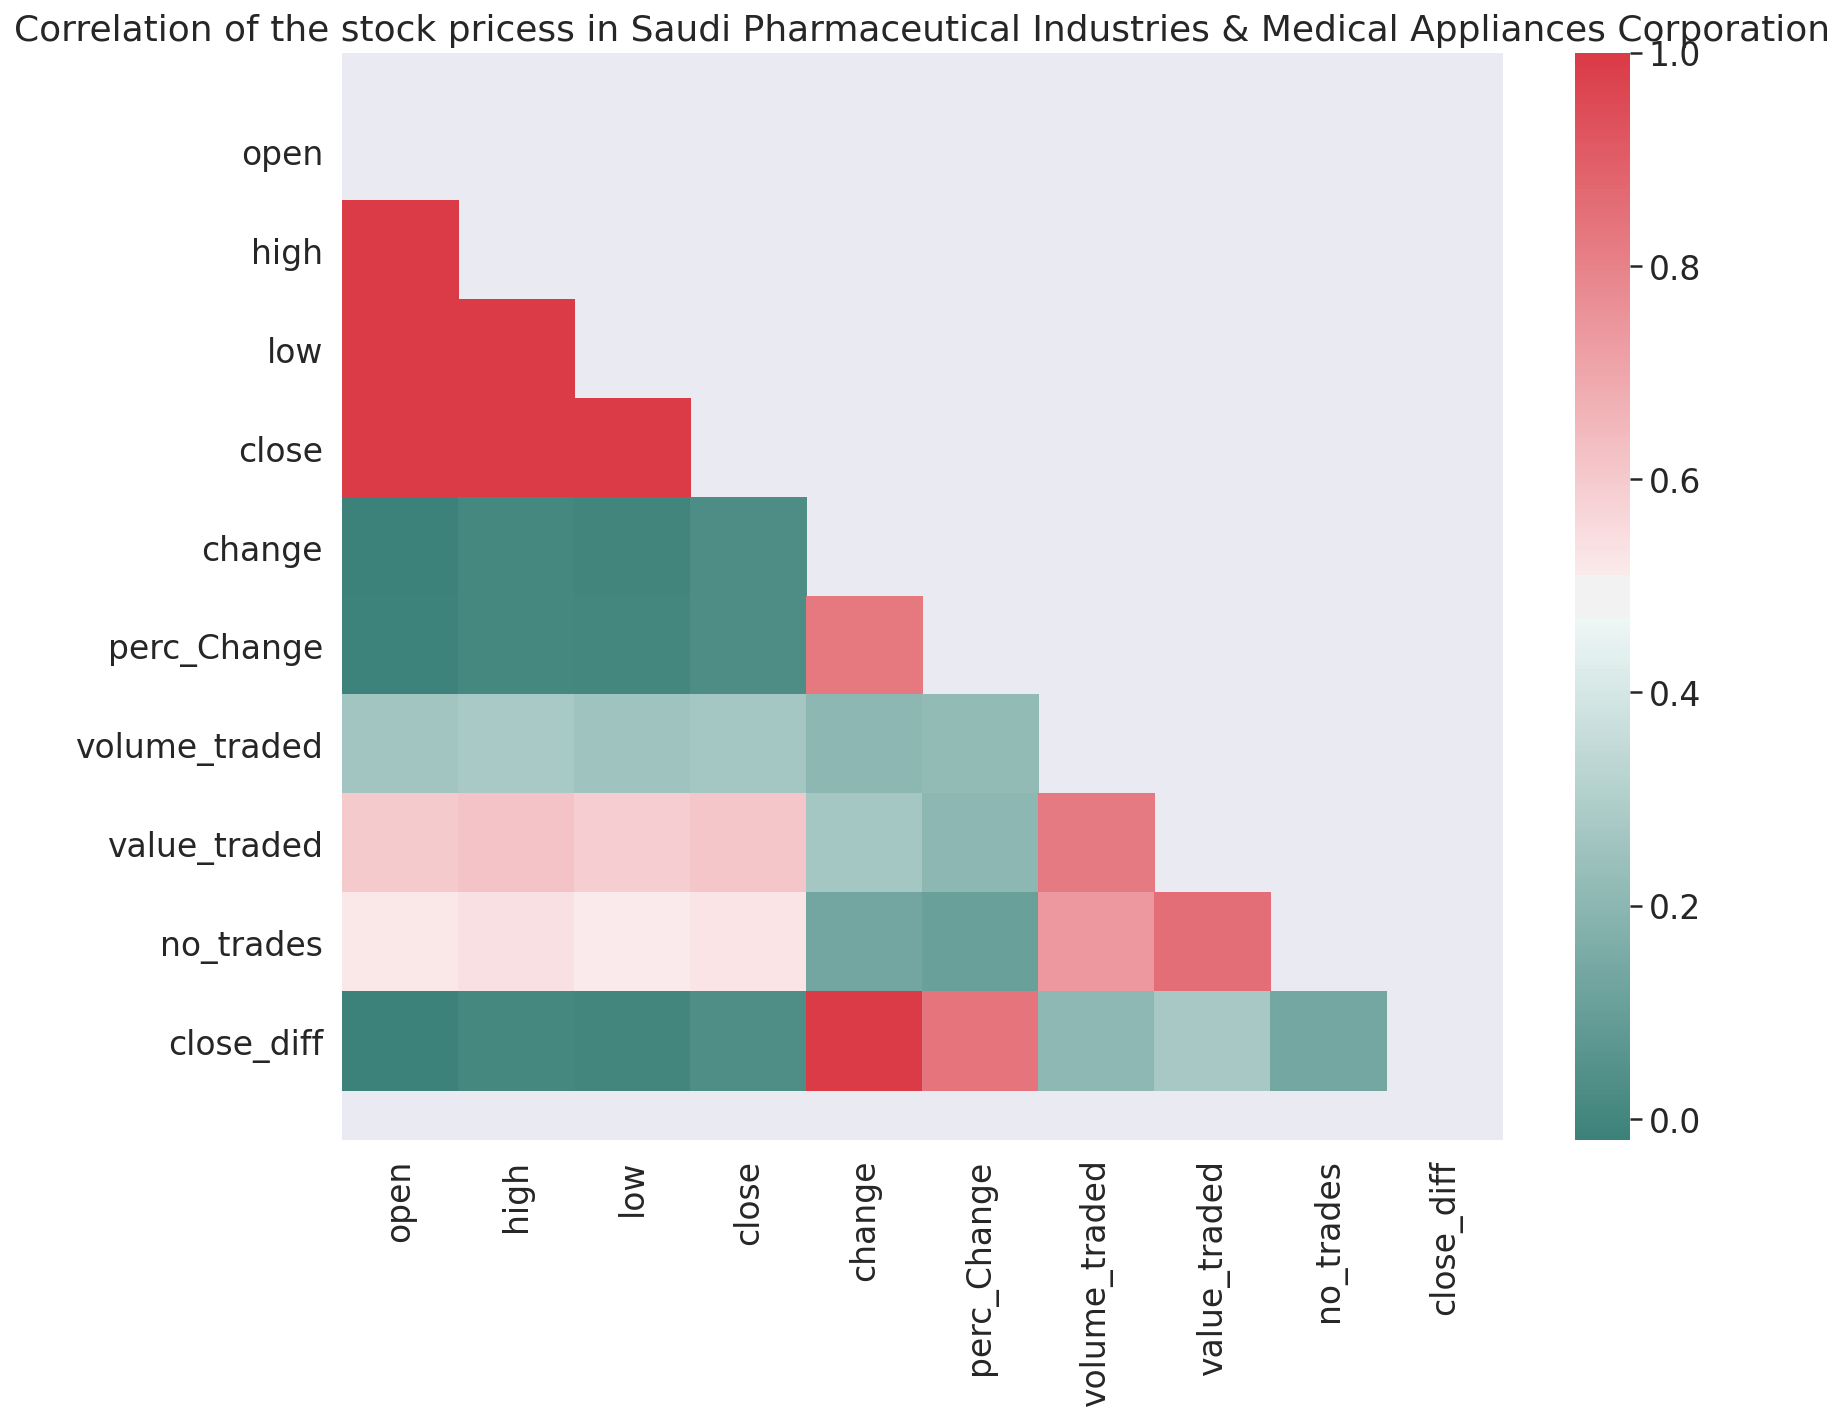

In [ ]:
corr_SPIMACO_df = SPIMACO_df.drop('symbol', axis=1).corr()
fig, axs = plt.subplots(figsize = (13, 10))
mask = np.triu(np.ones_like(corr_SPIMACO_df, dtype = np.bool))
sns.heatmap(corr_SPIMACO_df, ax = axs, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation of the stock pricess in Saudi Pharmaceutical Industries & Medical Appliances Corporation')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

## Preprocessing and Modeling

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

### A) Saudi Chemical Co.

In [ ]:
CHEMICAL_df.index.max(), CHEMICAL_df.index.min()

(Timestamp('2020-04-23 00:00:00'), Timestamp('2002-05-26 00:00:00'))

In [ ]:
# mid year
int((CHEMICAL_df.index.max().year + CHEMICAL_df.index.min().year) /2)

2011

In [ ]:
df_train = CHEMICAL_df.loc[:'2011']
df_test = CHEMICAL_df.loc['2012':'2019']

# train
close_train = df_train['close']
udiff_train = close_train.diff().dropna()

#test
close_test = df_test['close']
udiff_test = close_test.diff().dropna()

In [ ]:
df_train.shape , df_test.shape

((2496, 14), (1998, 14))

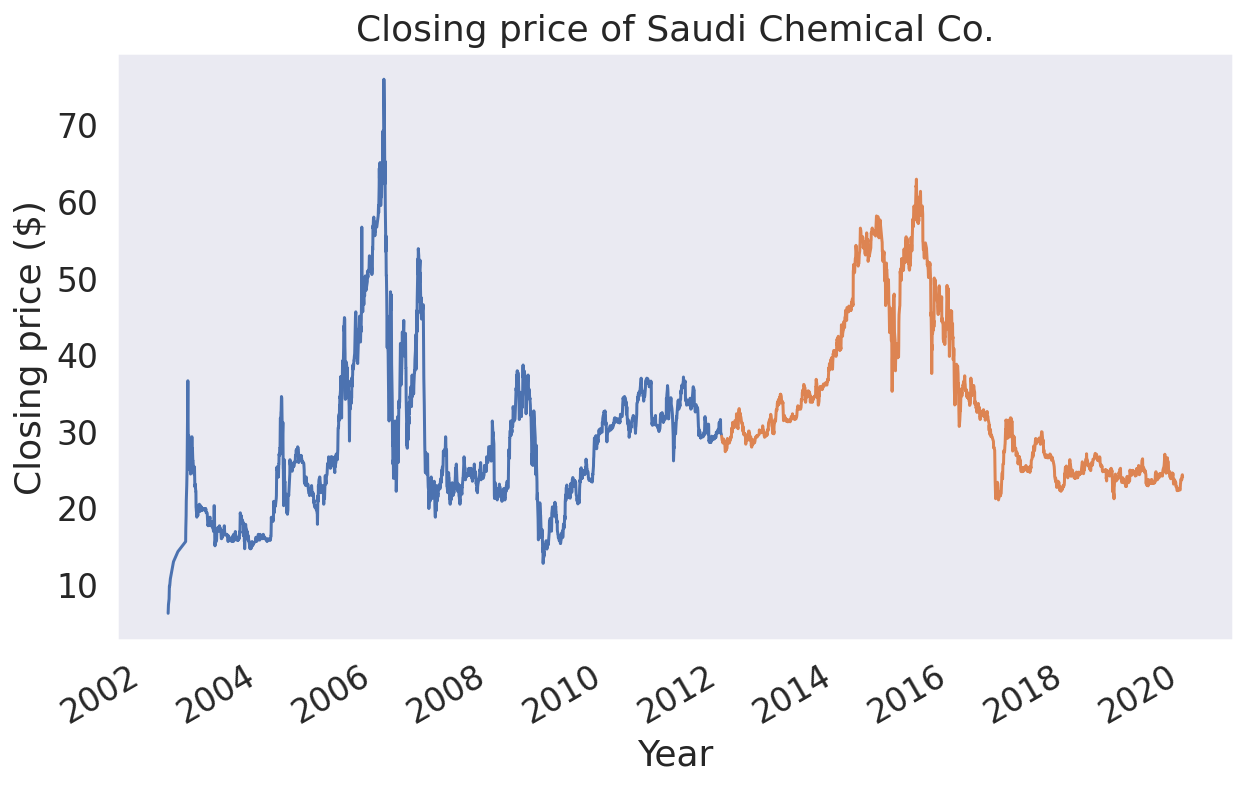

In [ ]:
# Plot the train and test sets on the axis ax
fig, ax = plt.subplots(figsize=(10, 6))
df_train['close'].plot(ax=ax)
df_test['close'].plot(ax=ax)
plt.title('Closing price of Saudi Chemical Co.')
plt.ylabel('Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

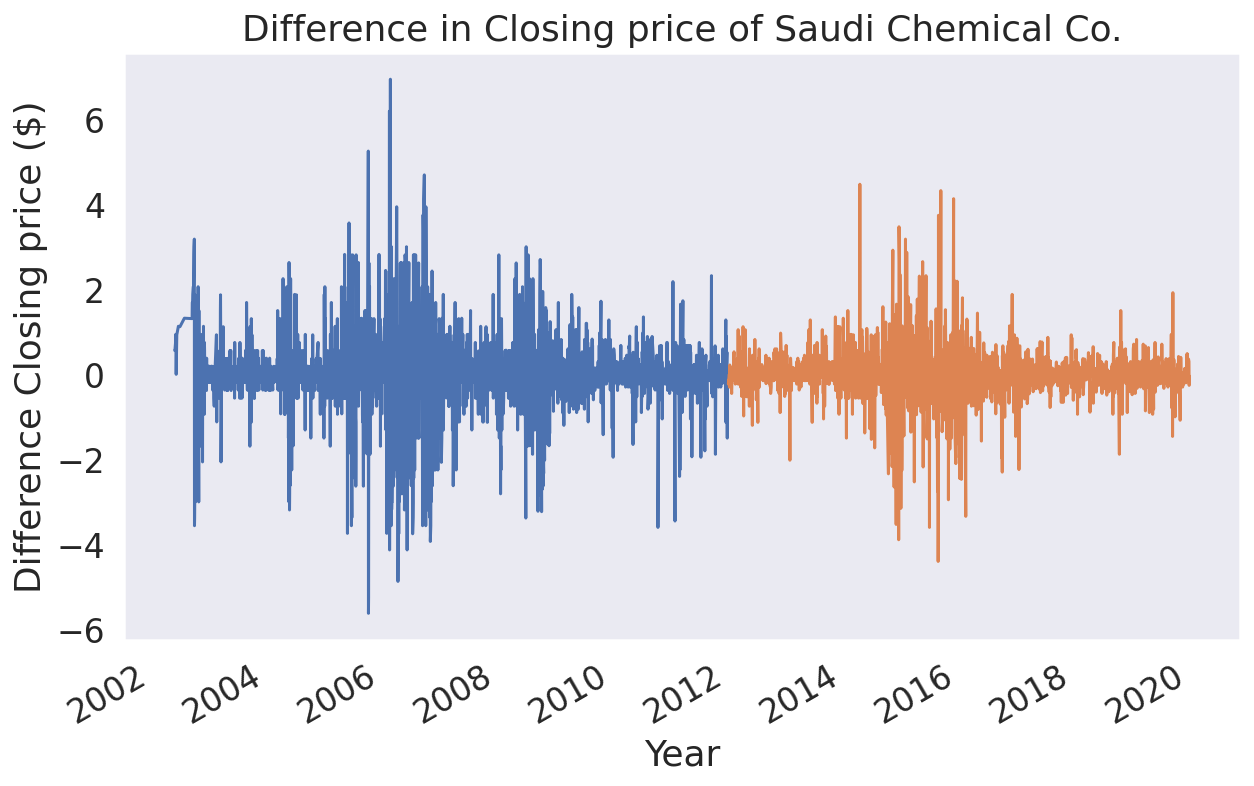

In [ ]:
# Plot the train and test sets on the axis ax
fig, ax = plt.subplots(figsize=(10, 6))
udiff_train.plot(ax=ax)
udiff_test.plot(ax=ax)
plt.title('Difference in Closing price of Saudi Chemical Co.')
plt.ylabel('Difference Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

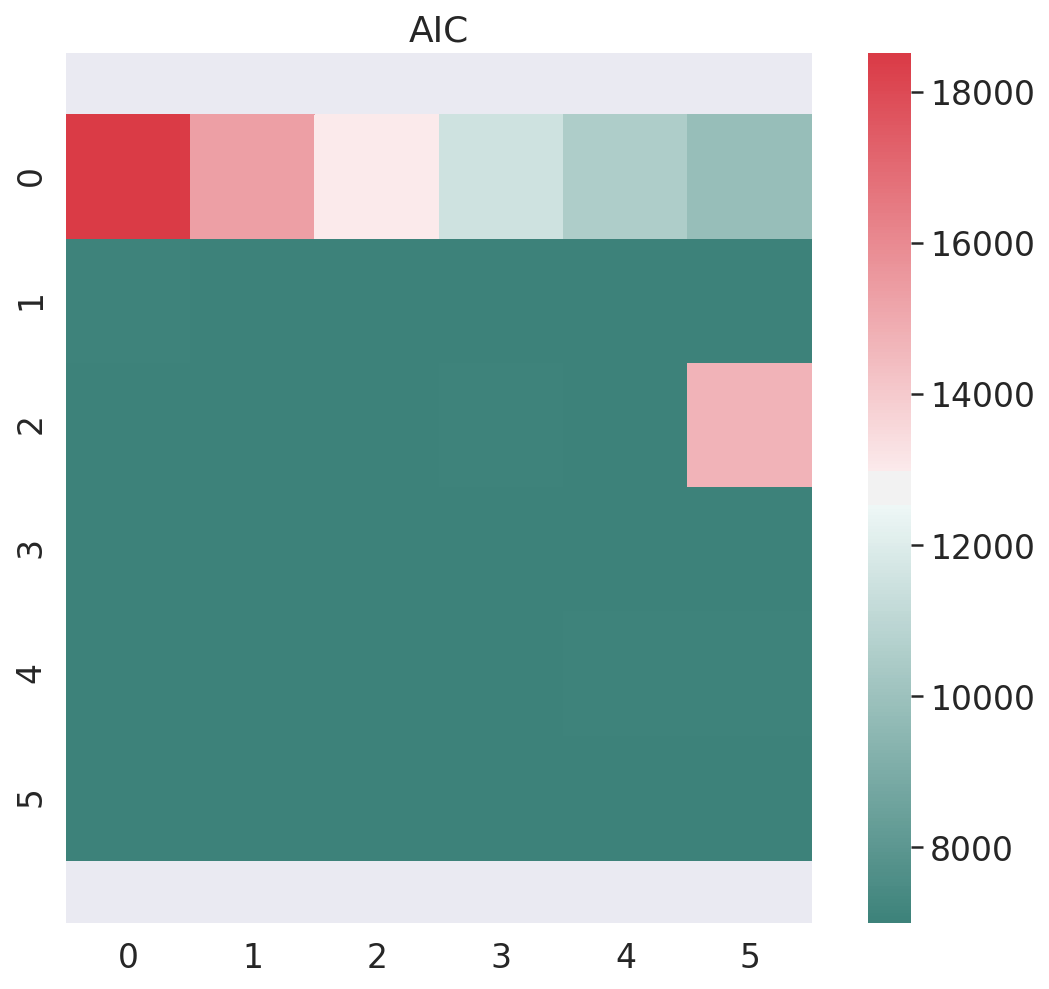

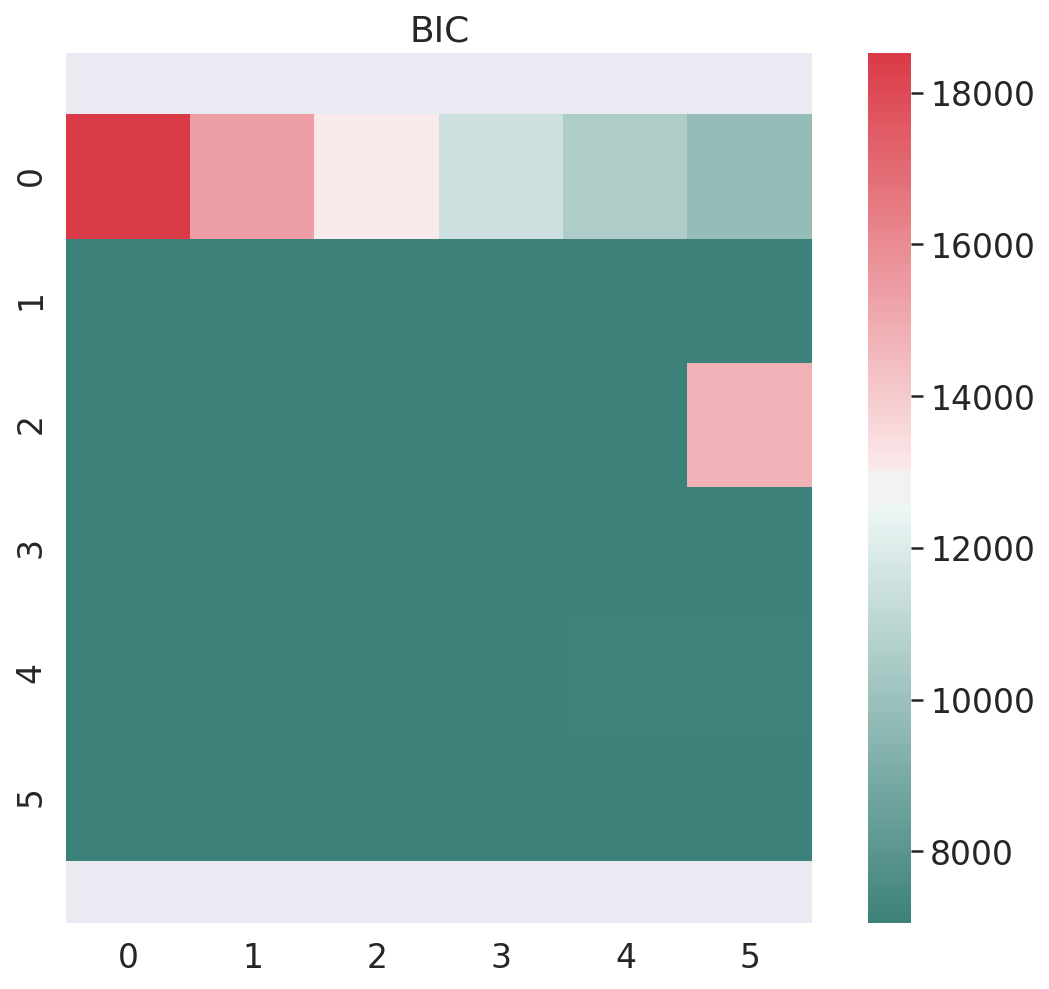

In [ ]:
#find the optimal parameters using AIC & BIC
auto_select = stattools.arma_order_select_ic(df_train['close'], max_ar=5, max_ma=5, ic=['aic', 'bic'])

plt.subplots(figsize = (10,8))
sns.heatmap(auto_select['aic'],  cmap = sns.diverging_palette(180, 10, as_cmap = True),square=True, fmt='.1f')
plt.title('AIC')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

plt.subplots(figsize = (10,8))
sns.heatmap(auto_select['bic'],  cmap = sns.diverging_palette(180, 10, as_cmap = True),square=True, fmt='.1f')
plt.title('BIC')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [ ]:
model = ARIMA(close_train,order=(2,0,0))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 2496
Model:                     ARMA(2, 0)   Log Likelihood               -3516.139
Method:                       css-mle   S.D. of innovations              0.989
Date:                Wed, 27 May 2020   AIC                           7040.277
Time:                        11:04:23   BIC                           7063.567
Sample:                             0   HQIC                          7048.733
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          26.7238      3.520      7.593      0.000      19.826      33.622
ar.L1.close     1.1241      0.020     56.653      0.000       1.085       1.163
ar.L2.close    -0.1294      0.020     -6.517      0.000      -0.168      -0.091
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0062           +0.0000j            1.0062            0.0000
AR.2            7.6792           +0.0000j            7.6792            0.0000
-----------------------------------------------------------------------------
"""

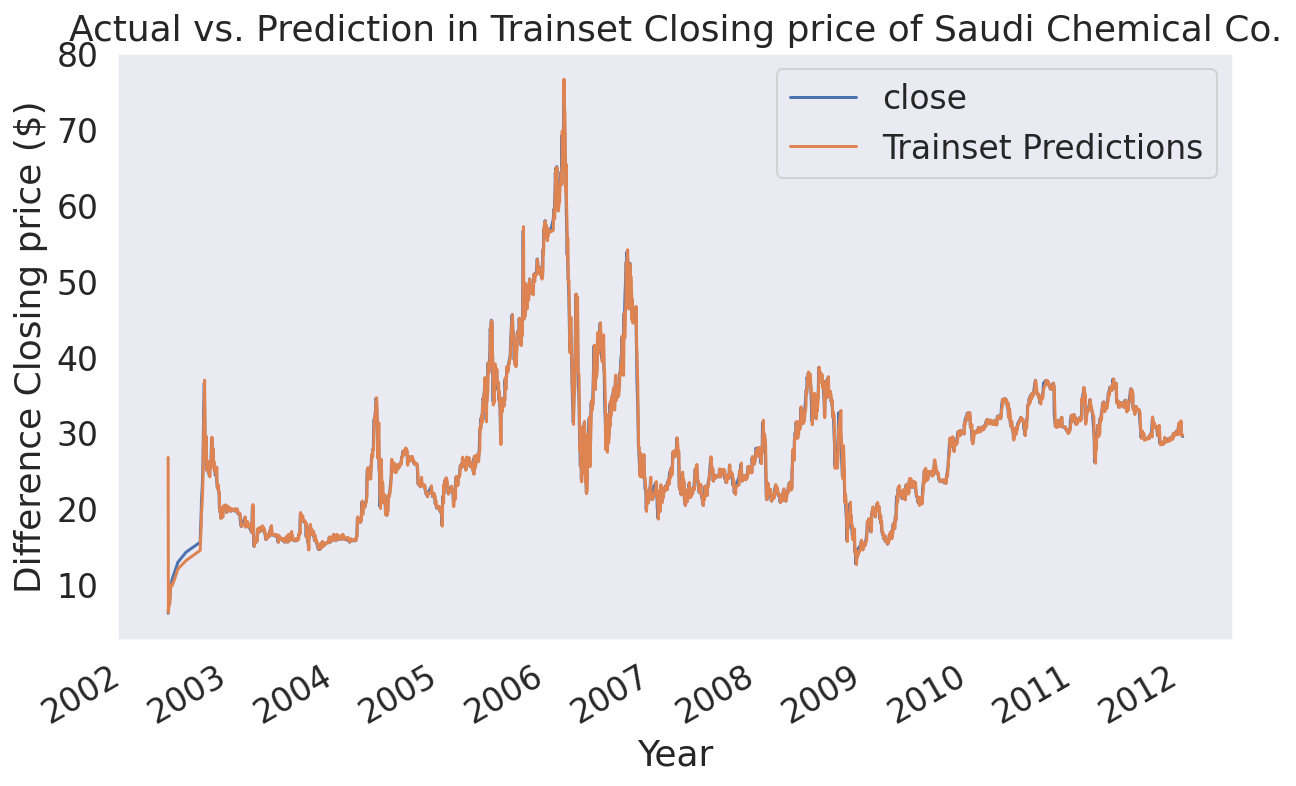

In [ ]:
# plot our prediction for train data
fig, ax = plt.subplots(figsize=(10, 6))
close_train.plot(legend = True)
res.fittedvalues.rename("Trainset Predictions").plot(legend = True)
plt.title('Actual vs. Prediction in Trainset Closing price of Saudi Chemical Co.')
plt.ylabel('Difference Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

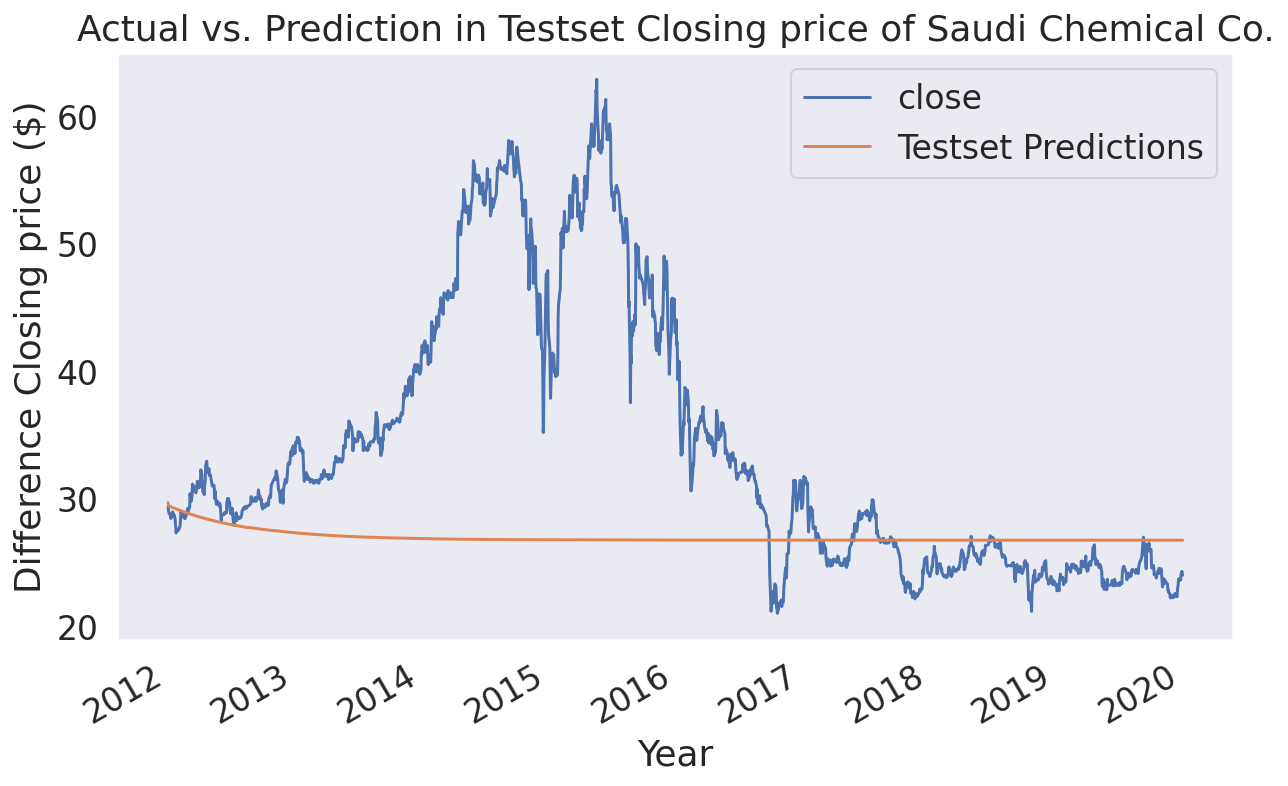

In [ ]:
start = len(udiff_train)
end = len(udiff_train) + len(udiff_test)

# Predictions for the test set
predictions = res.predict(start, end).rename("Testset Predictions")
predictions = pd.DataFrame(predictions)
predictions.set_index(df_test.index,inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))

close_test.plot(legend = True, ax = ax)
predictions.plot(legend = True, ax = ax)

plt.title('Actual vs. Prediction in Testset Closing price of Saudi Chemical Co.')
plt.ylabel('Difference Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

### B)  Saudi Pharmaceutical Industries & Medical Appliances Corporation

In [ ]:
SPIMACO_df.index.max(), SPIMACO_df.index.min()

(Timestamp('2020-04-23 00:00:00'), Timestamp('2001-12-31 00:00:00'))

In [ ]:
# mid year
int((SPIMACO_df.index.max().year + SPIMACO_df.index.min().year) /2)

2010

In [ ]:
df_train = SPIMACO_df.loc[:'2011']
df_test = SPIMACO_df.loc['2012':'2019']

# train
close_train = df_train['close']
udiff_train = close_train.diff().dropna()

#test
close_test = df_test['close']
udiff_test = close_test.diff().dropna()

In [ ]:
df_train.shape , df_test.shape

((2713, 14), (1998, 14))

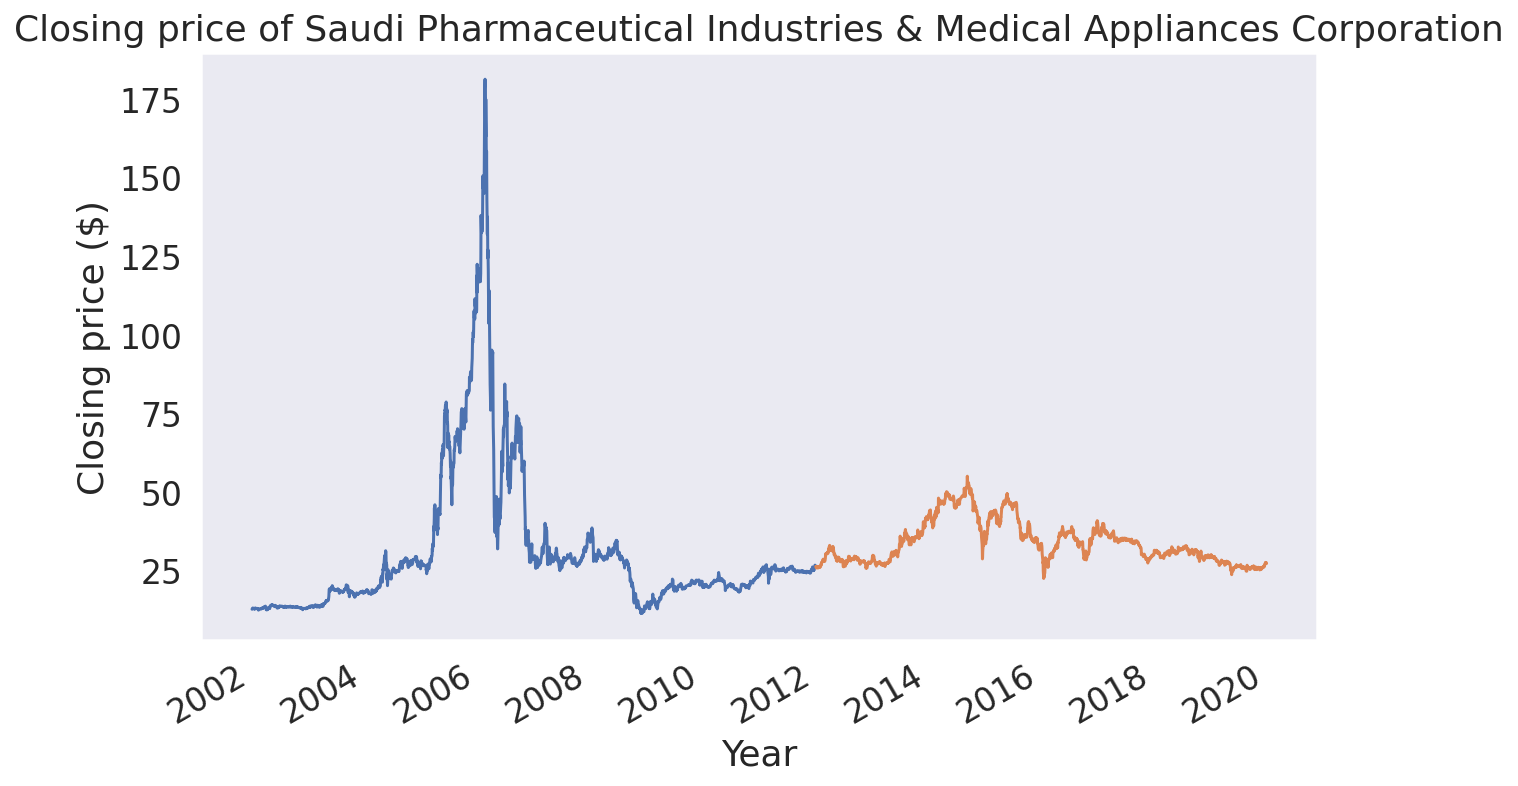

In [ ]:
# Plot the train and test sets on the axis ax
fig, ax = plt.subplots(figsize=(10, 6))
df_train['close'].plot(ax=ax)
df_test['close'].plot(ax=ax)
plt.title('Closing price of Saudi Pharmaceutical Industries & Medical Appliances Corporation')
plt.ylabel('Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

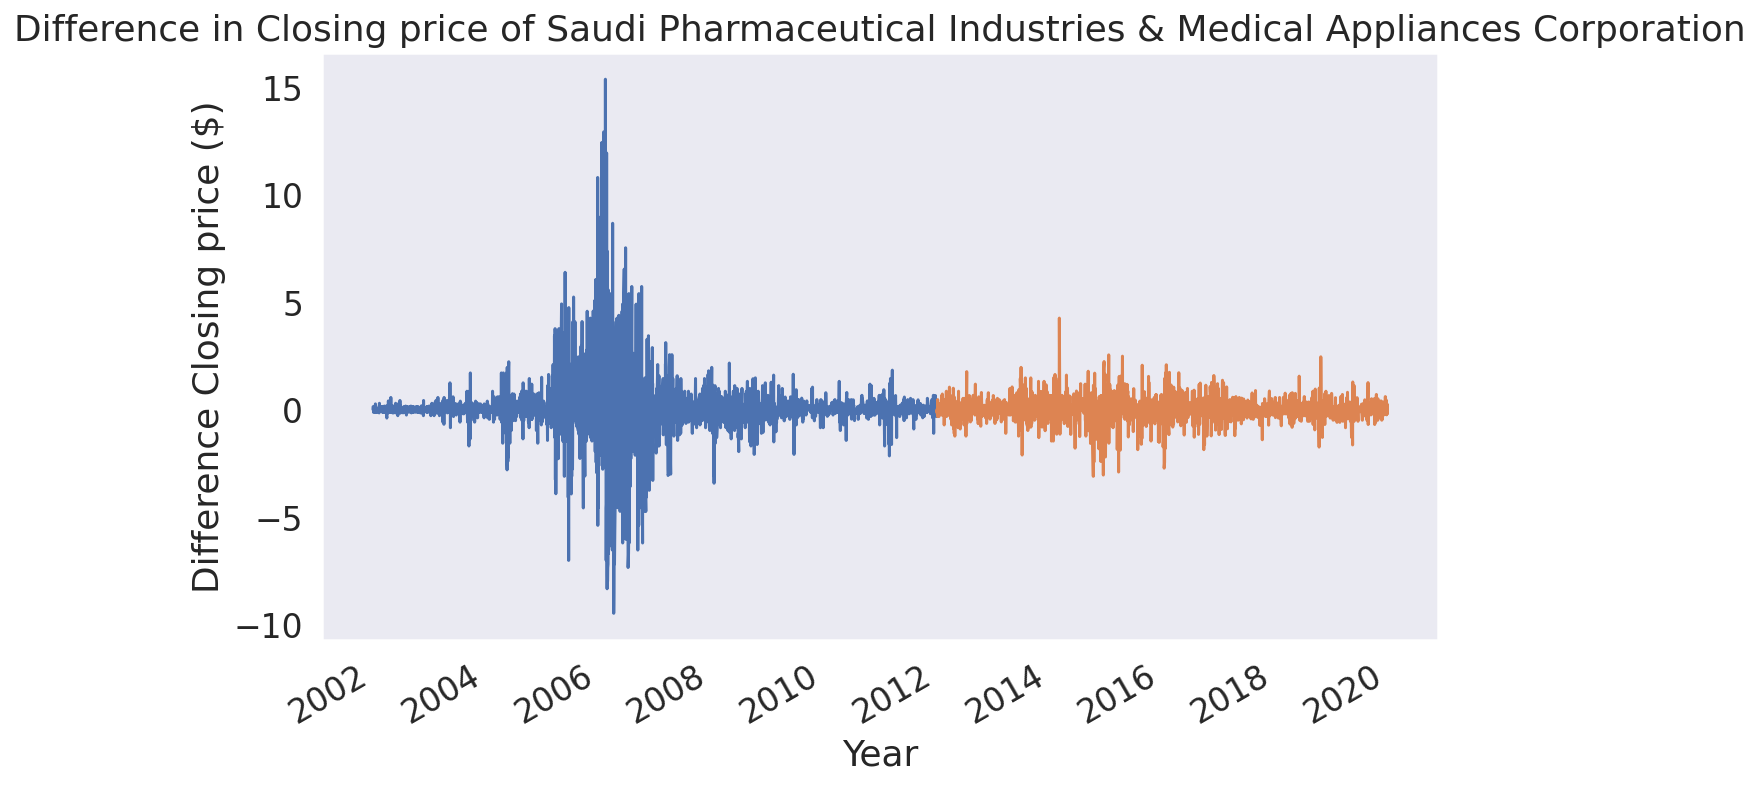

In [ ]:
# Plot the train and test sets on the axis ax
fig, ax = plt.subplots(figsize=(10, 6))
udiff_train.plot(ax=ax)
udiff_test.plot(ax=ax)
plt.title('Difference in Closing price of Saudi Pharmaceutical Industries & Medical Appliances Corporation')
plt.ylabel('Difference Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

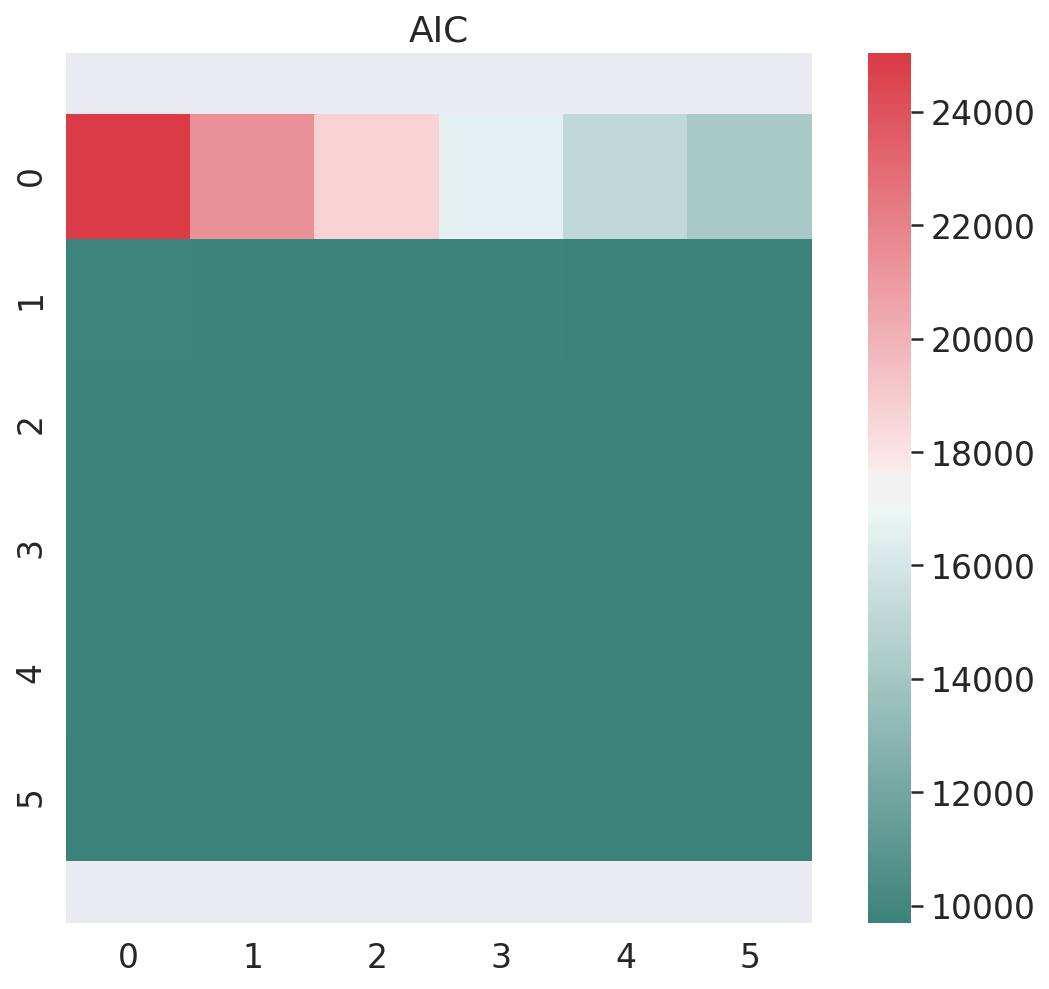

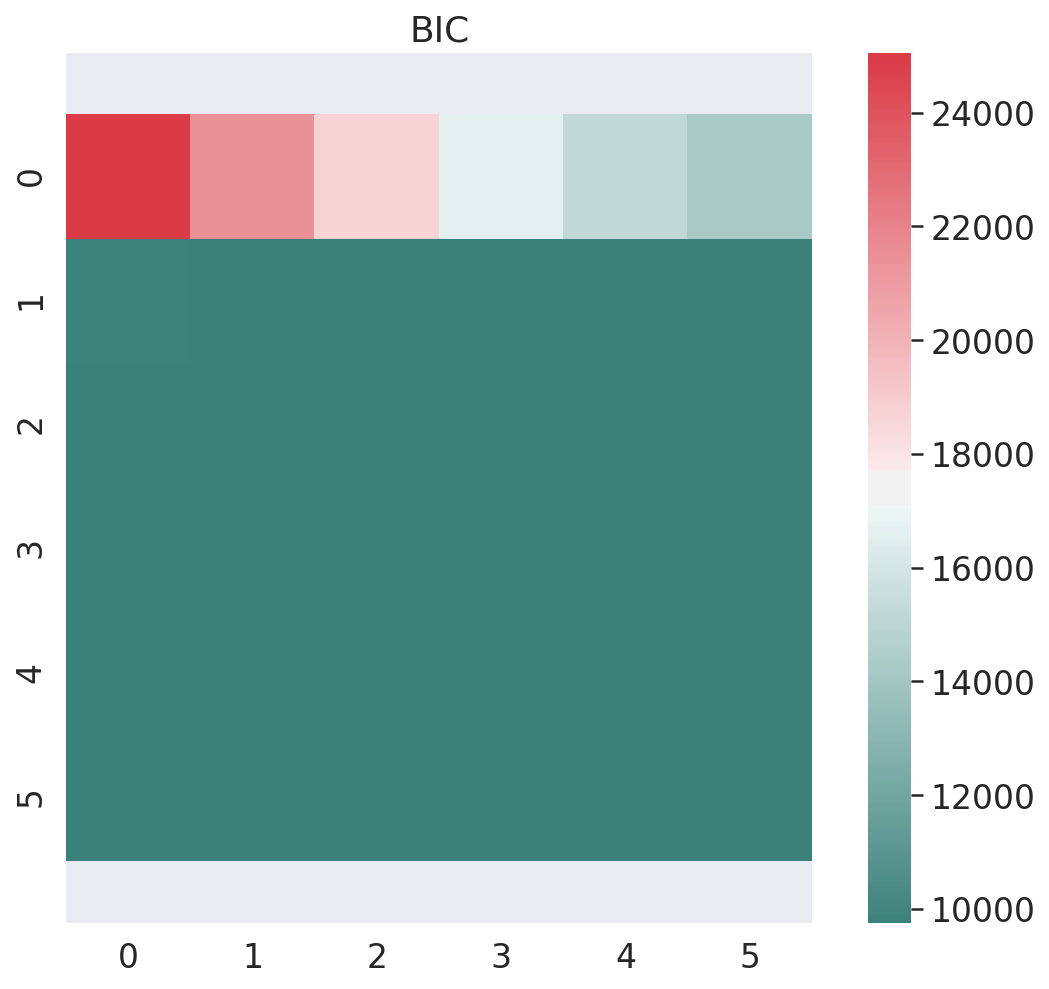

In [ ]:
#find the optimal parameters using AIC & BIC
auto_select = stattools.arma_order_select_ic(df_train['close'], max_ar=5, max_ma=5, ic=['aic', 'bic'])

plt.subplots(figsize = (10,8))
sns.heatmap(auto_select['aic'],  cmap = sns.diverging_palette(180, 10, as_cmap = True),square=True, fmt='.1f')
plt.title('AIC')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

plt.subplots(figsize = (10,8))
sns.heatmap(auto_select['bic'],  cmap = sns.diverging_palette(180, 10, as_cmap = True),square=True, fmt='.1f')
plt.title('BIC')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [ ]:
model = ARIMA(close_train,order=(1,0,1))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 2713
Model:                     ARMA(1, 1)   Log Likelihood               -4887.638
Method:                       css-mle   S.D. of innovations              1.465
Date:                Wed, 27 May 2020   AIC                           9783.275
Time:                        11:05:48   BIC                           9806.898
Sample:                             0   HQIC                          9791.816
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          28.4495     11.155      2.550      0.011       6.586      50.313
ar.L1.close     0.9975      0.001    821.512      0.000       0.995       1.000
ma.L1.close     0.1218      0.018      6.783      0.000       0.087       0.157
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0025           +0.0000j            1.0025            0.0000
MA.1           -8.2097           +0.0000j            8.2097            0.5000
-----------------------------------------------------------------------------
"""

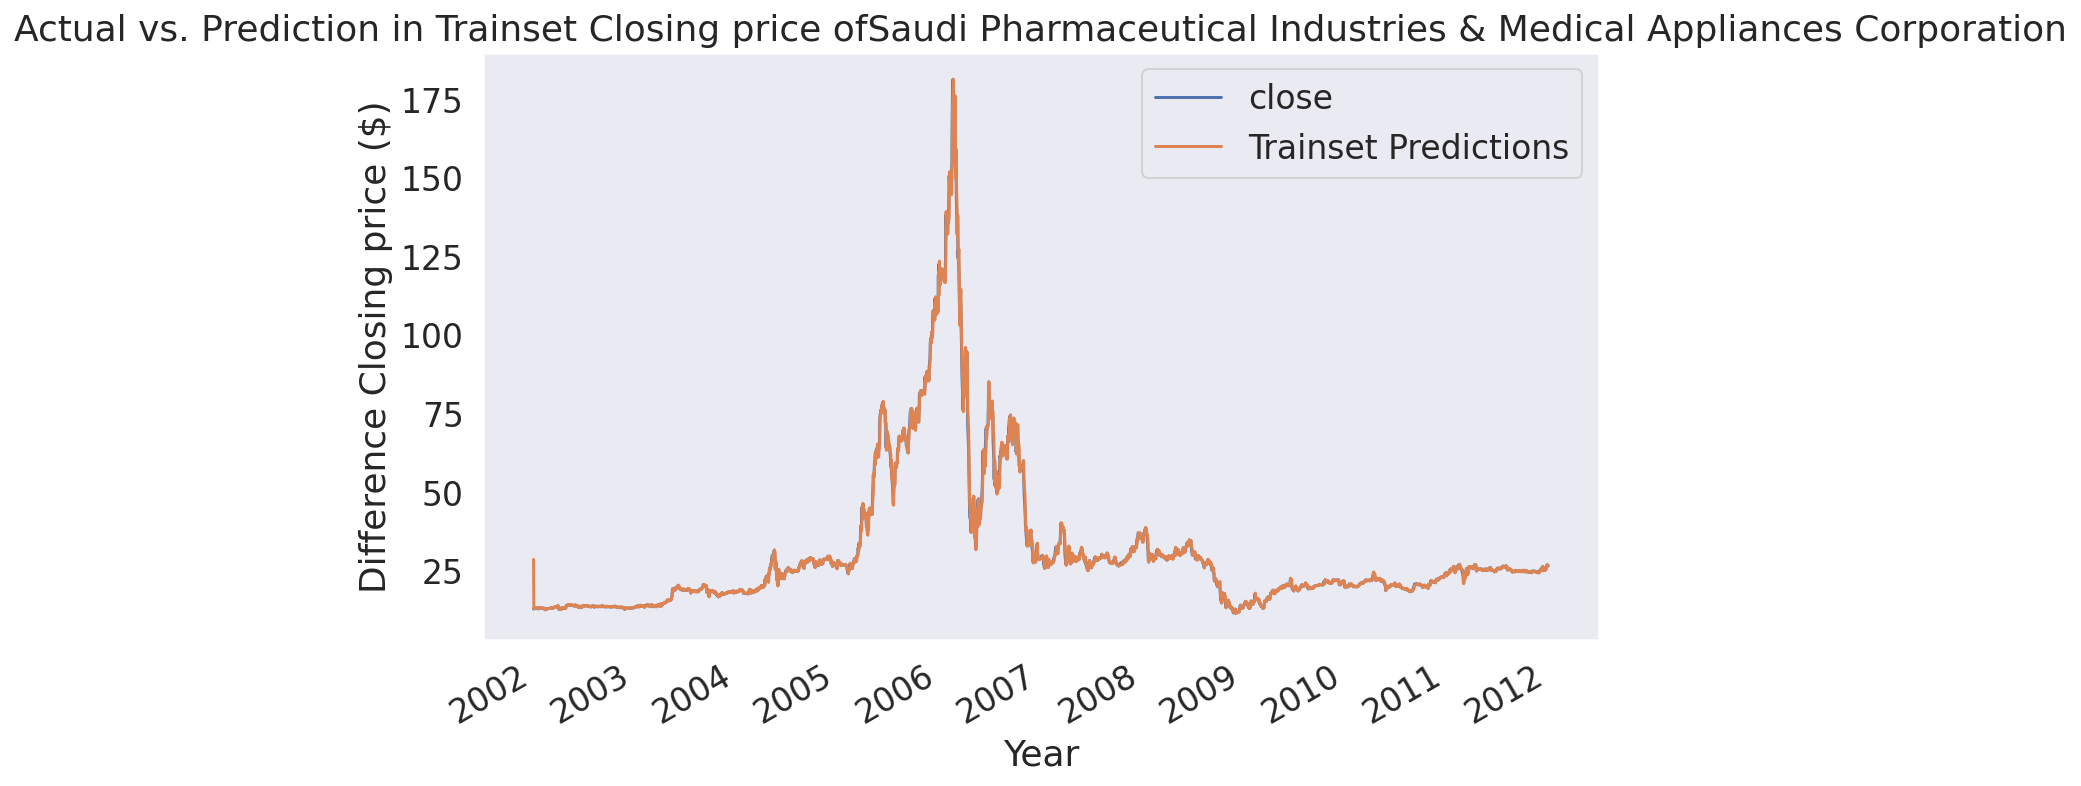

In [ ]:
# plot our prediction for train data
fig, ax = plt.subplots(figsize=(10, 6))
close_train.plot(legend = True)
res.fittedvalues.rename("Trainset Predictions").plot(legend = True)
plt.title('Actual vs. Prediction in Trainset Closing price ofSaudi Pharmaceutical Industries & Medical Appliances Corporation')
plt.ylabel('Difference Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

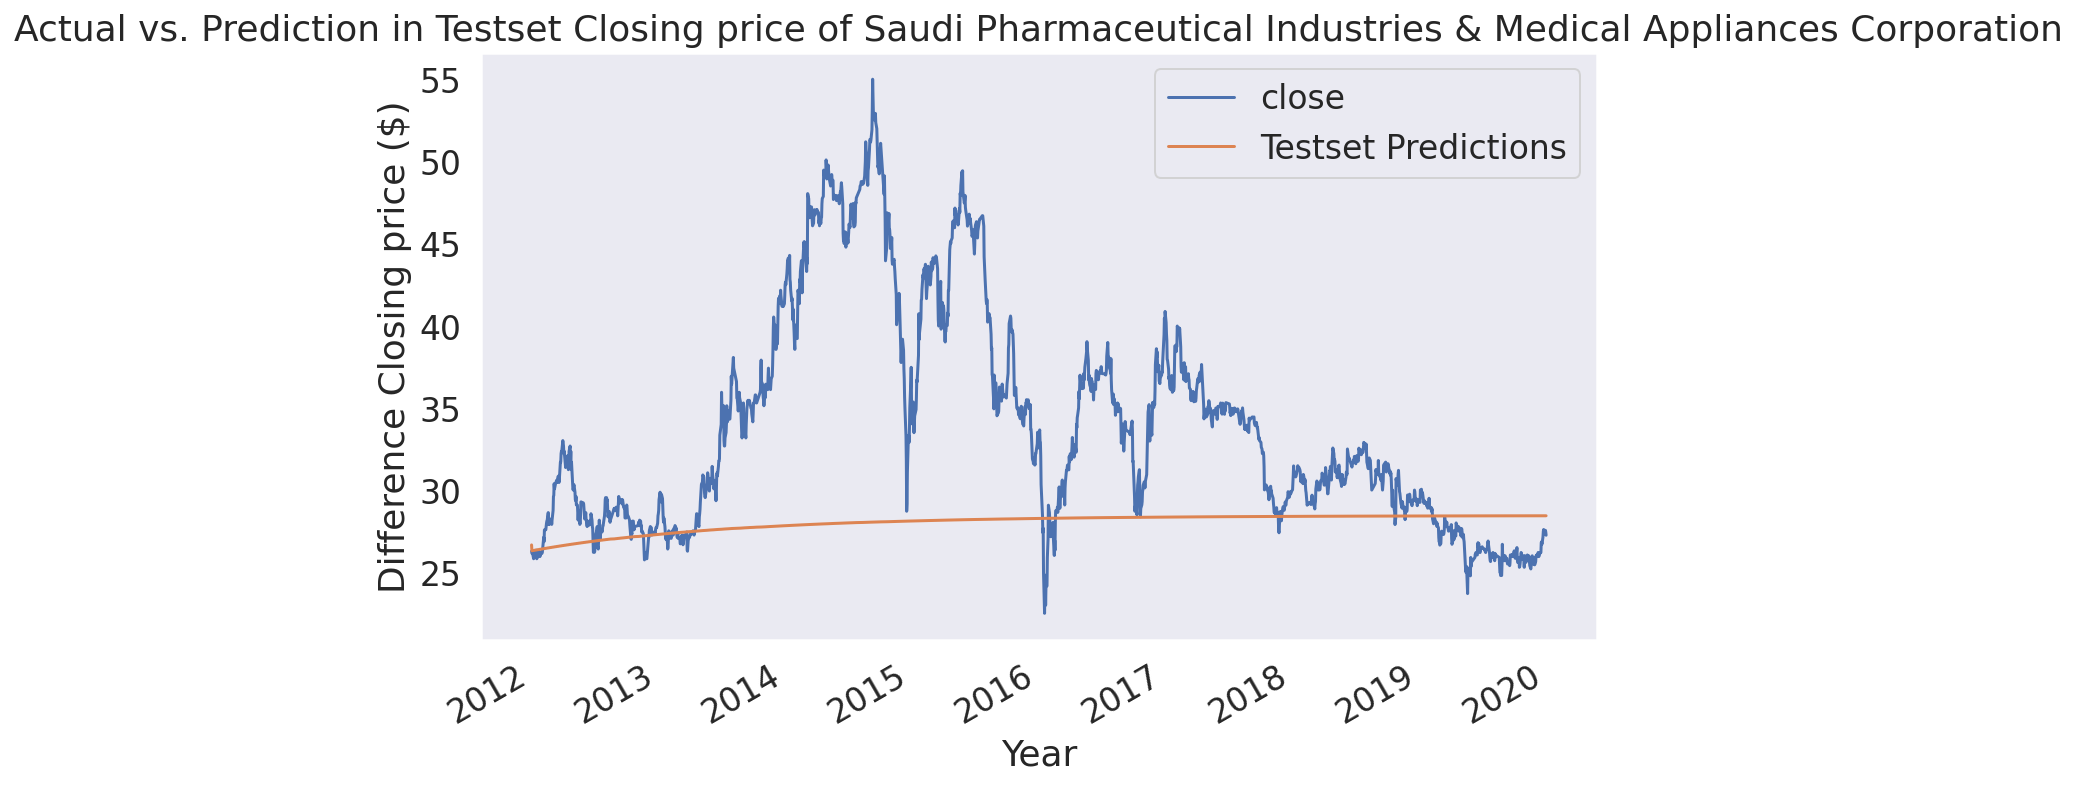

In [ ]:
start = len(udiff_train)
end = len(udiff_train) + len(udiff_test)

# Predictions for the test set
predictions = res.predict(start, end).rename("Testset Predictions")
predictions = pd.DataFrame(predictions)
predictions.set_index(df_test.index,inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))

close_test.plot(legend = True, ax = ax)
predictions.plot(legend = True, ax = ax)

plt.title('Actual vs. Prediction in Testset Closing price of Saudi Pharmaceutical Industries & Medical Appliances Corporation')
plt.ylabel('Difference Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

## Conclusions and Recommendations

Using data science in the stock market is not new, but that doesn't apply for Saudi Stock Exchange (Tadawul), We are trying to explore the saudi stocks in the healthcare sector, so we can predict their closing prices using time series analysis with ARIMA. We chosing the two older companies in the healthcare sector to study, which are Saudi Chemical Co. and Saudi Pharmaceutical Industries & Medical Appliances Corporation.